In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Online Retail.xlsx - Online Retail.csv")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df["CustomerID"].fillna(0,inplace=True)

<ipython-input-7-fcc0ab35f121>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CustomerID"].fillna(0,inplace=True)


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
stock_and_description_dictinary=df.dropna(subset=["Description"]).set_index('StockCode')['Description'].to_dict()

In [ ]:
df["Description"]=df.apply(lambda row:stock_and_description_dictinary.get(row["StockCode"],row["Description"]),axis=1)

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
ratio=112/541797
print(ratio)

0.0002067194908794253


In [ ]:
df.dropna(axis="index",how="any",subset=["Description"],inplace=True)

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541797 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541797 non-null  object 
 1   StockCode    541797 non-null  object 
 2   Description  541797 non-null  object 
 3   Quantity     541797 non-null  int64  
 4   InvoiceDate  541797 non-null  object 
 5   UnitPrice    541797 non-null  float64
 6   CustomerID   541797 non-null  float64
 7   Country      541797 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [ ]:
df["net sales"]=df["Quantity"]*df["UnitPrice"]

In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales
0,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE MOROCCAN METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df["Date"]=df["InvoiceDate"].dt.date

<ipython-input-18-8b6a1c8e0fc7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])


In [ ]:
df["Time"]=df["InvoiceDate"].dt.time

In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time
0,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE MOROCCAN METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00


In [ ]:
df["Date"]=pd.to_datetime(df["Date"])
df["Month"]=df["Date"].dt.to_period('M')

In [ ]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month
0,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12-01,08:26:00,2010-12


In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
net sales,float64
Date,datetime64[ns]


In [ ]:
df["Month"]=df["Month"].dt.to_timestamp()


In [ ]:
df["Day name"]=df["Date"].dt.day_name()

In [ ]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
0,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12-01,08:26:00,2010-12-01,Wednesday


In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
net sales,float64
Date,datetime64[ns]


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
0,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,2010-12-01,Wednesday
1,536365,71053,WHITE MOROCCAN METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,2010-12-01,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday


In [ ]:
sumnet_sales=df["net sales"].sum()
print(sumnet_sales)

9747747.934


 sales trends over month

In [ ]:
Net_sales_per_month=df.groupby("Month")["net sales"].sum()
Net_sales_per_month

,net sales
Month,
2010-12-01,748957.020
2011-01-01,560000.260
2011-02-01,498062.650
2011-03-01,683267.080
2011-04-01,493207.121
2011-05-01,723333.510
2011-06-01,691123.120
2011-07-01,681300.111
2011-08-01,682680.510


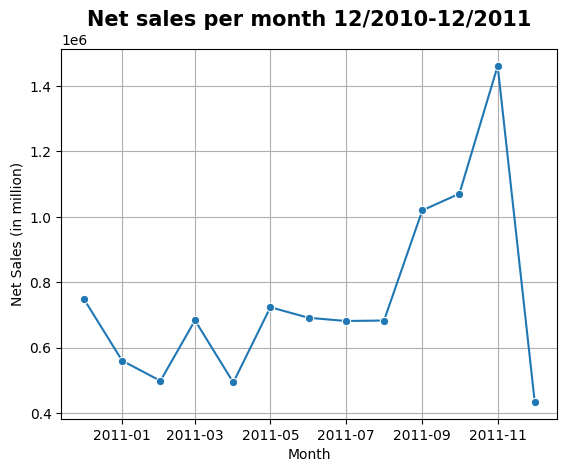

In [ ]:
sns.lineplot(data=Net_sales_per_month,marker="o")
plt.title("Net sales per month 12/2010-12/2011",fontsize=15,fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Net Sales (in million)")
plt.grid()
plt.show()

###Most of the countries are European countries. We notice that sales are affected by the peak season.


The chart shows the net sales per month for the year 2011 it indicates that sales were low at the beginning of the year but started to increase significantly as the months progressed. A sharp rise is observed in October and November, indicating a peak sales season likely due to events or seasonal promotions then the trend drops sharply in December.



Peak Season in Retail refers to specific periods during the year when demand for products significantly increases due to holidays, events, or seasonal trends. These periods typically include major holidays like Christmas, Black Friday, and Back-to-School season. Retailers experience higher sales volumes, increased foot traffic, and a surge in online orders.

Net sales per DAY

In [ ]:
Net_sales_per_day=df.groupby("Date")["net sales"].sum()
Net_sales_per_day

,net sales
Date,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-05,31383.95
2010-12-06,53860.18
...,...
2011-12-05,57751.32
2011-12-06,54228.37
2011-12-07,75076.22


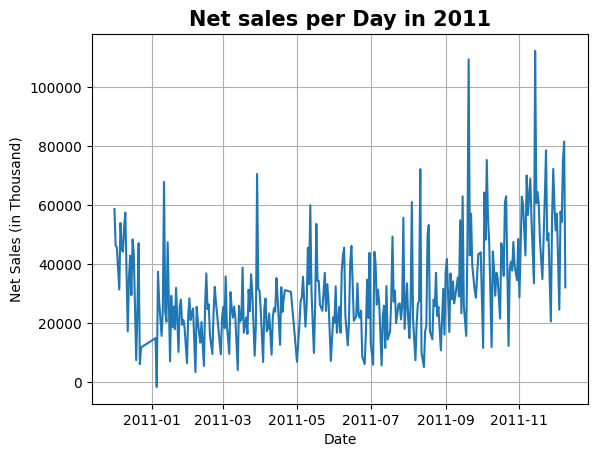

In [ ]:
sns.lineplot(Net_sales_per_day)
plt.title("Net sales per Day in 2011",fontsize=15,fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Net Sales (in Thousand)")
plt.grid()
plt.show()

 This chart shows the total net sales per day in 2011,We notice that :
- a clear fluctuation in daily sales is observed throughout the year
-There are sharp spikes indicating specific events or seasons
-The overall trend suggests a gradual increase in sales towards the end of the year







Sales per Country

In [ ]:
sales_per_country=df.groupby("Country")["net sales"].sum()
sales_per_country

,net sales
Country,
Australia,137077.270
Austria,10154.320
Bahrain,548.400
Belgium,40910.960
Brazil,1143.600
Canada,3666.380
Channel Islands,20086.290
Cyprus,12946.290
Czech Republic,707.720


<ipython-input-35-ad8f5bc841ab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_per_country,palette="viridis")


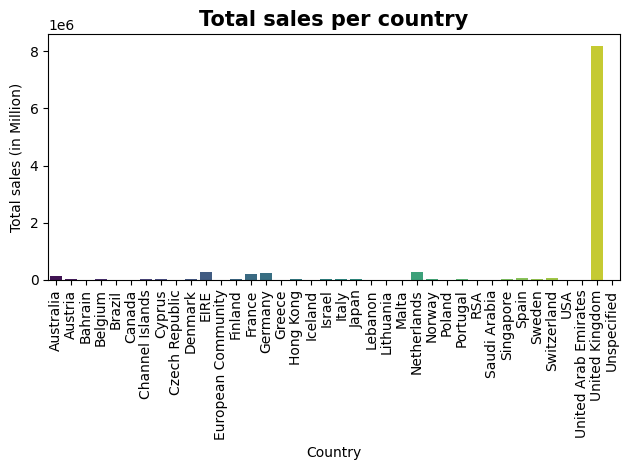

In [ ]:
sns.barplot(data=sales_per_country,palette="viridis")
plt.title("Total sales per country",fontsize=15,fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Total sales (in Million)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


This chart shows the total sales per country during the study period we notic that:

-The United Kingdom stands out as the country with the highest sales, significantly surpassing other countries.

-Most other countries show relatively low sales.

-this distribution suggests a concentrated customer base or primary market in the United Kingdom.


Because the UK numbers were significantly different from other countries, I will study the sales behavior and details separately for the UK and for the other countries


In [ ]:
dfu=df[df["Country"]=="United Kingdom"]
dfu.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
0,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,2010-12-01,Wednesday
1,536365,71053,WHITE MOROCCAN METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,2010-12-01,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday


In [ ]:
#Number of countries
df["Country"].nunique()

38

In [ ]:
df["Country"].unique().tolist()

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'EIRE',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Channel Islands',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Bahrain',
 'Greece',
 'Hong Kong',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Unspecified',
 'Brazil',
 'USA',
 'European Community',
 'Malta',
 'RSA']

Now i want study all information about United Kingdom

dfu the data farme for united Kingdom

In [ ]:
dfu=df[df["Country"]=="United Kingdom"]
dfu.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
0,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,2010-12-01,Wednesday
1,536365,71053,WHITE MOROCCAN METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,2010-12-01,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday


In [ ]:
unitedkingdom_net_sales=dfu.groupby("Date")["net sales"].sum()

In [ ]:
total_net_sales_in_united_kingdom=dfu["net sales"].sum()
print(total_net_sales_in_united_kingdom)

8187806.364000001


In [ ]:
monthly_average_net_sales_in_UK=total_net_sales_in_united_kingdom/12
print(monthly_average_net_sales_in_UK)

682317.197


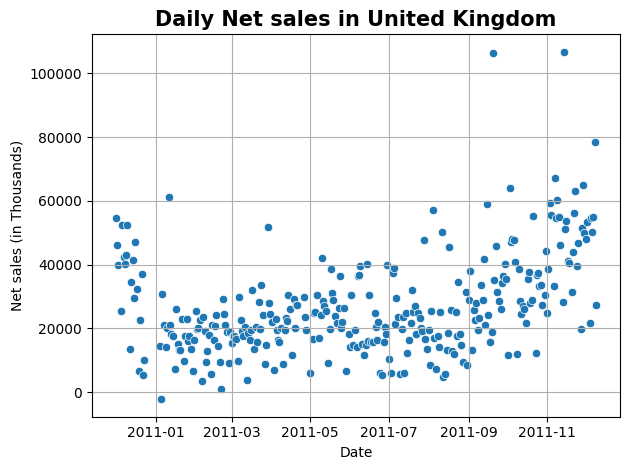

In [ ]:
sns.scatterplot(data=unitedkingdom_net_sales)
plt.title("Daily Net sales in United Kingdom",fontsize=15,fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Net sales (in Thousands)")
plt.grid()
plt.tight_layout()
plt.show()

The chart shows daily net sales in the United Kingdom agradual increase in sales over time is observed.

some outlier points representing exceptionally high sales, possibly indicating special events or large orders

In [ ]:
monthly_net_sales_unitedkingdom=dfu.groupby("Month")["net sales"].sum()
print(monthly_net_sales_unitedkingdom)

Month
2010-12-01     676742.620
2011-01-01     434308.300
2011-02-01     408247.910
2011-03-01     559707.390
2011-04-01     442254.041
2011-05-01     596459.860
2011-06-01     554478.350
2011-07-01     565479.841
2011-08-01     539130.500
2011-09-01     862018.152
2011-10-01     877438.190
2011-11-01    1282805.780
2011-12-01     388735.430
Name: net sales, dtype: float64


In [ ]:
avg_monthly_net_sales_unitedkingdom=dfu["net sales"].sum()
print(avg_monthly_net_sales_unitedkingdom/12)

682317.197


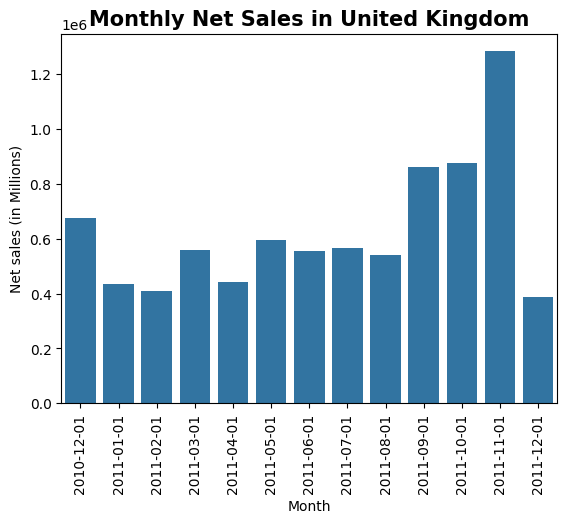

In [ ]:
sns.barplot(monthly_net_sales_unitedkingdom)
plt.title("Monthly Net Sales in United Kingdom",fontsize=15,fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Net sales (in Millions)")
plt.xticks(rotation=90)
plt.show()

The chart shows monthly net sales in the United Kingdom a significant increase in sales is observed during the last quarter of the year, which may reflect the impact of the holiday season and celebrations on sales

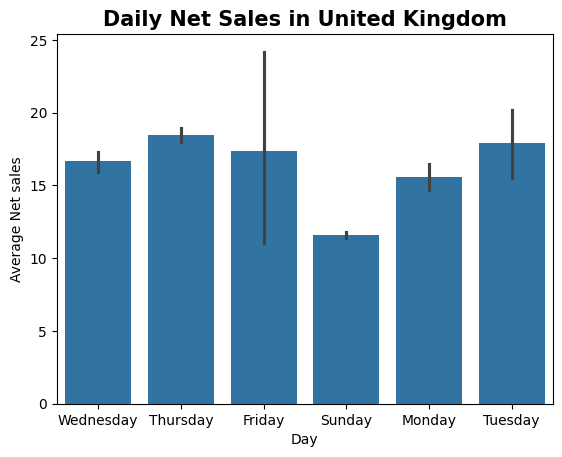

In [ ]:
sns.barplot(x="Day name",y="net sales",data=dfu)
plt.title("Daily Net Sales in United Kingdom",fontsize=15,fontweight="bold")
plt.xlabel("Day")
plt.ylabel("Average Net sales")
plt.show()

The chart displays Daily Net Sales in the United Kingdom,we noticed that Tuesday and Thursday hve the highest average sales, followed by Friday with a relatively high value.

 These slight differences across the days could be attributed to consumer behavior, promotional campaigns, or seasonal factors.

The vertical line on each bar in the chart represents indicates the variability or dispersion of the values around the mean.

 If the lines are longer, it means there is more variability in the daily values. If they are shorter, the daily values are more stable and closer to the averag

In [ ]:
dfu["Day name"].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

There is no data recorded on Saturday, it may be a holiday for the store.**bold text**


---



the most net sales in Thursday and Tuseday

Lets see which customer That the top

#When graphed, customers with zero numbers were the ones who bought the most.
#so i am going to creat a new data frame witout them

In [ ]:
df_customer=dfu[dfu["CustomerID"]!=0]

In [ ]:
df_customer.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
0,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12-01,08:26:00,2010-12-01,Wednesday


In [ ]:
Total_net_sales_for_each_customer=df_customer.groupby("CustomerID")["net sales"].sum()

<Axes: xlabel='CustomerID', ylabel='net sales'>

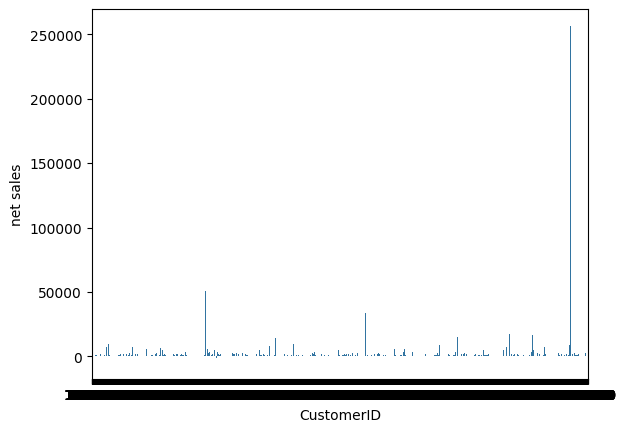

In [ ]:
sns.barplot(Total_net_sales_for_each_customer)


**i see that the chart is unclear due to the large number of customers, so I will create a chart for the top 10 customers contributing to the total sales**

In [ ]:
Total_net_sales_for_top_ten_customer=df_customer.groupby("CustomerID")["net sales"].sum().nlargest(10)

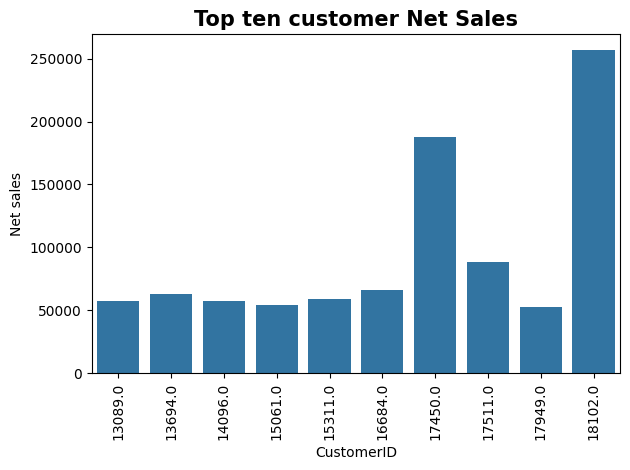

In [ ]:
sns.barplot(data=Total_net_sales_for_top_ten_customer)
plt.title("Top ten customer Net Sales",fontsize=15,fontweight="bold")
plt.xlabel("CustomerID")
plt.ylabel("Net sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This bar chart represents the top 10 customers in terms of net sales.

 It shows that the customer with ID 18102.0 has the highest sales compared to others,the other customers have relatively close sales figures

In [ ]:
The_top_customer=(Total_net_sales_for_each_customer).idxmax()
print(The_top_customer)

18102.0


In [ ]:
The_min_net_sales_customer=(Total_net_sales_for_each_customer).idxmin()
print(The_min_net_sales_customer)

17448.0


#The customer with the number 18102 is the one who has purchased the most from the store.

What is the most purchased item?




In [ ]:
df_Thetop_customer=df_customer[df_customer["CustomerID"]==18102.0]

In [ ]:
df_Thetop_customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
16425,537657,82484,WOOD BLACK BOARD ANT WHITE FINISH,408,2010-12-07 16:42:00,4.78,18102.0,United Kingdom,1950.24,2010-12-07,16:42:00,2010-12-01,Tuesday
16426,537657,22830,UTILTY CABINET WITH HOOKS,30,2010-12-07 16:42:00,19.84,18102.0,United Kingdom,595.20,2010-12-07,16:42:00,2010-12-01,Tuesday
16427,537657,22189,CREAM HEART CARD HOLDER,972,2010-12-07 16:42:00,2.31,18102.0,United Kingdom,2245.32,2010-12-07,16:42:00,2010-12-01,Tuesday
16428,537657,22188,BLACK HEART CARD HOLDER,972,2010-12-07 16:42:00,2.31,18102.0,United Kingdom,2245.32,2010-12-07,16:42:00,2010-12-01,Tuesday
16429,537657,21623,VINTAGE UNION JACK MEMOBOARD,408,2010-12-07 16:42:00,6.38,18102.0,United Kingdom,2603.04,2010-12-07,16:42:00,2010-12-01,Tuesday


In [ ]:
df_Thetop_customer["StockCode"].nunique()

151

In [ ]:
Most_purchased_item_from_this_Customer=df_Thetop_customer.groupby("StockCode")["Quantity"].sum()

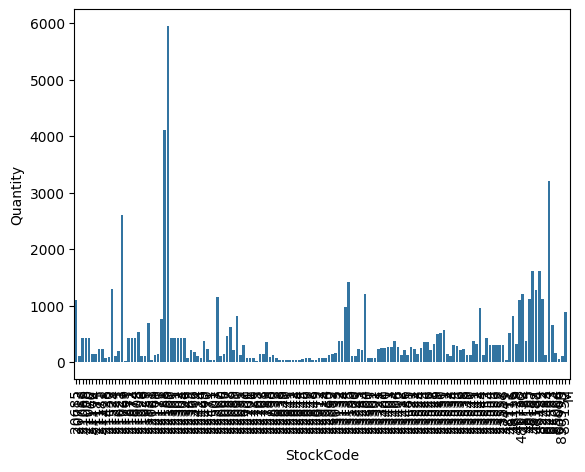

In [ ]:
sns.barplot(Most_purchased_item_from_this_Customer)
plt.xticks(rotation=90)
plt.show()

In [ ]:
Most_ten_purchased_item_from_this_Customer=df_Thetop_customer.groupby("StockCode")["Quantity"].sum().nlargest(10)

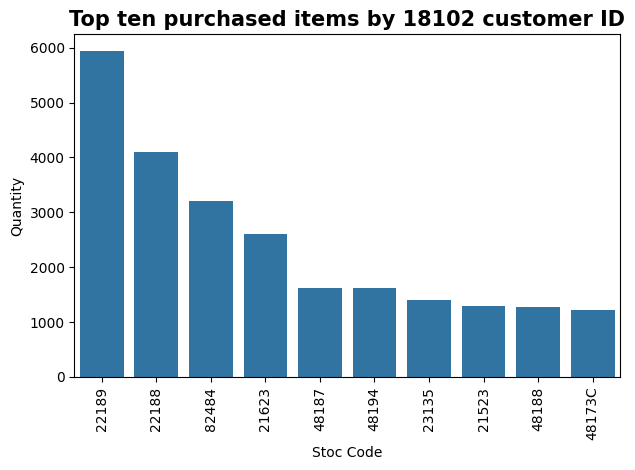

In [ ]:
sns.barplot(data=Most_ten_purchased_item_from_this_Customer)
plt.title("Top ten purchased items by 18102 customer ID",fontsize=15,fontweight="bold")
plt.xlabel("Stoc Code")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


This bar chart shows the top 10 purchased items by the customer with ID 18102, the item with code 22189 is the most purchased, followed by the item with code 22188, indicating a clear preference for these products compared to others

In [ ]:
The_Top_stockId_most_selling=Most_purchased_item_from_this_Customer.idxmax()
print(The_Top_stockId_most_selling)

22189


In [ ]:
dfu[dfu['StockCode']=="22189"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
164,536384,22189,CREAM HEART CARD HOLDER,4,2010-12-01 09:53:00,3.95,18074.0,United Kingdom,15.80,2010-12-01,09:53:00,2010-12-01,Wednesday
729,536437,22189,CREAM HEART CARD HOLDER,72,2010-12-01 12:12:00,3.39,13694.0,United Kingdom,244.08,2010-12-01,12:12:00,2010-12-01,Wednesday
1530,536544,22189,CREAM HEART CARD HOLDER,1,2010-12-01 14:32:00,8.47,0.0,United Kingdom,8.47,2010-12-01,14:32:00,2010-12-01,Wednesday
3148,536604,22189,CREAM HEART CARD HOLDER,12,2010-12-02 08:43:00,3.95,14741.0,United Kingdom,47.40,2010-12-02,08:43:00,2010-12-01,Thursday
9165,537193,22189,CREAM HEART CARD HOLDER,6,2010-12-05 13:49:00,3.95,15023.0,United Kingdom,23.70,2010-12-05,13:49:00,2010-12-01,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536601,581219,22189,CREAM HEART CARD HOLDER,1,2011-12-08 09:28:00,8.29,0.0,United Kingdom,8.29,2011-12-08,09:28:00,2011-12-01,Thursday
538703,581412,22189,CREAM HEART CARD HOLDER,2,2011-12-08 14:38:00,3.95,14415.0,United Kingdom,7.90,2011-12-08,14:38:00,2011-12-01,Thursday
538928,581424,22189,CREAM HEART CARD HOLDER,4,2011-12-08 15:29:00,3.95,13890.0,United Kingdom,15.80,2011-12-08,15:29:00,2011-12-01,Thursday
540010,581455,22189,CREAM HEART CARD HOLDER,10,2011-12-08 18:25:00,2.31,18102.0,United Kingdom,23.10,2011-12-08,18:25:00,2011-12-01,Thursday


In [ ]:
Most_ten_purchased_item_in_UK=dfu.groupby("StockCode")["Quantity"].sum().nlargest(10)

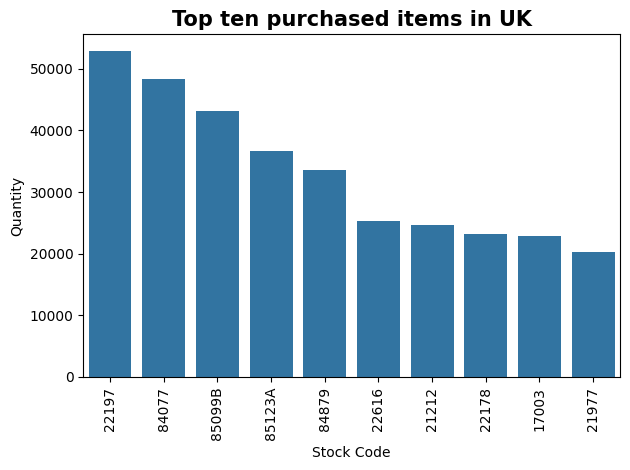

In [ ]:
sns.barplot(data=Most_ten_purchased_item_in_UK)
plt.title("Top ten purchased items in UK",fontsize=15,fontweight="bold")
plt.xlabel("Stock Code")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#now we satart to study to Other Country

In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
0,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,2010-12-01,Wednesday
1,536365,71053,WHITE MOROCCAN METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday


In [ ]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df["Country"].nunique()

38

#data frame without united Kingdom

In [ ]:
df2=df[df["Country"]!="United Kingdom"]
df2.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,2010-12-01,08:45:00,2010-12-01,Wednesday
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,2010-12-01,08:45:00,2010-12-01,Wednesday


In [ ]:
Total_net_sales_without_UK=df2.groupby("Country")["net sales"].sum()

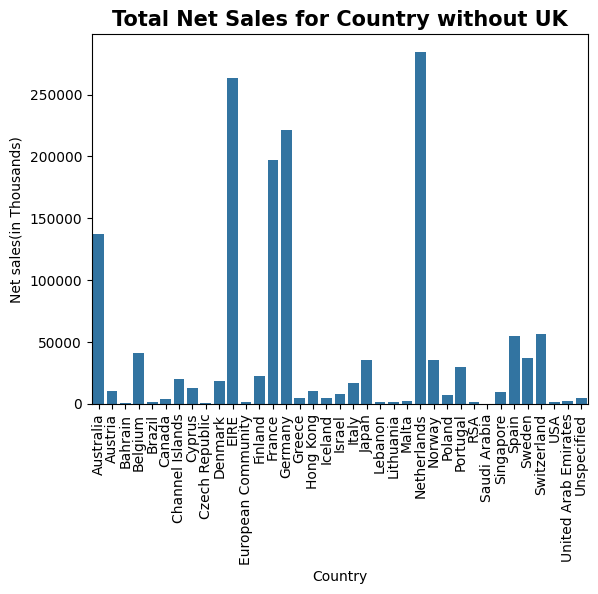

In [ ]:
sns.barplot(data=Total_net_sales_without_UK)
plt.title("Total Net Sales for Country without UK",fontsize=15,fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Net sales(in Thousands)")
plt.xticks(rotation=90)
plt.show()

This bar chart shows the total net sales for all countries excluding the United Kingdom. It is evident that countries like Netherlands and ERIE and Germany have the highest net sales compared to others, indicating strong demand in these markets

In [ ]:
Top_selling_country_name=Total_net_sales_without_UK.idxmax()
print(Top_selling_country_name)

Netherlands


In [ ]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,2010-12-01,08:45:00,2010-12-01,Wednesday
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,2010-12-01,08:45:00,2010-12-01,Wednesday
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.0,2010-12-01,08:45:00,2010-12-01,Wednesday
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.2,2010-12-01,08:45:00,2010-12-01,Wednesday
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.6,2010-12-01,08:45:00,2010-12-01,Wednesday


In [ ]:
df2["Month"]=df2["Date"].dt.to_period('M')

<ipython-input-76-286b93fdcf82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Month"]=df2["Date"].dt.to_period('M')


In [ ]:
df2["Country"].unique()

array(['France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE',
       'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark',
       'Cyprus', 'Sweden', 'Austria', 'Israel', 'Finland', 'Bahrain',
       'Greece', 'Hong Kong', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Malta',
       'RSA'], dtype=object)

In [ ]:
asian_countries=['Japan','Israel','Bahrain','Greece','Hong Kong','Singapore','Lebanon','United Arab Emirates','Cyprus','Saudi Arabia']

In [ ]:
df_asian=df2[df2["Country"].isin(asian_countries)]

In [ ]:
df_Non_Asian=df2[~df2["Country"].isin(asian_countries)]

In [ ]:
df_asian.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,15.30,2010-12-05,15:46:00,2010-12,Sunday
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763.0,Japan,5.04,2010-12-05,15:46:00,2010-12,Sunday


In [ ]:
df_asian.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2082 entries, 9783 to 530280
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    2082 non-null   object        
 1   StockCode    2082 non-null   object        
 2   Description  2082 non-null   object        
 3   Quantity     2082 non-null   int64         
 4   InvoiceDate  2082 non-null   datetime64[ns]
 5   UnitPrice    2082 non-null   float64       
 6   CustomerID   2082 non-null   float64       
 7   Country      2082 non-null   object        
 8   net sales    2082 non-null   float64       
 9   Date         2082 non-null   datetime64[ns]
 10  Time         2082 non-null   object        
 11  Month        2082 non-null   period[M]     
 12  Day name     2082 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(6), period[M](1)
memory usage: 227.7+ KB


In [ ]:
df_asian.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,net sales,Date
count,2082.000000,2082,2082.000000,2082.000000,2082.000000,2082
mean,23.607109,2011-05-30 06:30:10,21.354784,10712.587896,40.546787,2011-05-29 18:28:42.190201600
min,-624.000000,2010-12-05 15:46:00,0.060000,0.000000,-3949.320000,2010-12-05 00:00:00
25%,4.000000,2011-02-09 11:21:00,1.250000,12359.000000,12.600000,2011-02-09 00:00:00
50%,10.000000,2011-05-13 14:09:00,2.100000,12565.000000,19.800000,2011-05-13 00:00:00
75%,24.000000,2011-09-01 17:45:00,4.225000,12744.000000,45.000000,2011-09-01 00:00:00
max,2040.000000,2011-12-06 11:40:00,3949.320000,17829.000000,3949.320000,2011-12-06 00:00:00
std,78.720512,NaN,208.436599,4783.227773,249.128888,NaN


In [ ]:
df_Non_Asian.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44349 entries, 26 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    44349 non-null  object        
 1   StockCode    44349 non-null  object        
 2   Description  44349 non-null  object        
 3   Quantity     44349 non-null  int64         
 4   InvoiceDate  44349 non-null  datetime64[ns]
 5   UnitPrice    44349 non-null  float64       
 6   CustomerID   44349 non-null  float64       
 7   Country      44349 non-null  object        
 8   net sales    44349 non-null  float64       
 9   Date         44349 non-null  datetime64[ns]
 10  Time         44349 non-null  object        
 11  Month        44349 non-null  period[M]     
 12  Day name     44349 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(6), period[M](1)
memory usage: 4.7+ MB


In [ ]:
df_Non_Asian.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,net sales,Date
count,44349.000000,44349,44349.000000,44349.000000,44349.000000,44349
mean,19.469909,2011-07-10 04:55:19.001555968,4.704229,12869.279217,33.270720,2011-07-09 16:16:53.055536640
min,-480.000000,2010-12-01 08:45:00,0.000000,0.000000,-8322.120000,2010-12-01 00:00:00
25%,4.000000,2011-04-11 12:20:00,1.250000,12477.000000,12.500000,2011-04-11 00:00:00
50%,10.000000,2011-07-29 13:28:00,1.950000,12642.000000,17.340000,2011-07-29 00:00:00
75%,16.000000,2011-10-12 12:08:00,3.750000,14156.000000,29.700000,2011-10-12 00:00:00
max,2400.000000,2011-12-09 12:50:00,4161.060000,17844.000000,4992.000000,2011-12-09 00:00:00
std,45.212929,NaN,46.388895,2352.862284,92.206197,NaN


In [ ]:
df_asian.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,15.30,2010-12-05,15:46:00,2010-12,Sunday
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763.0,Japan,5.04,2010-12-05,15:46:00,2010-12,Sunday
9785,537218,22716,CARD CIRCUS PARADE,12,2010-12-05 15:46:00,0.42,12763.0,Japan,5.04,2010-12-05,15:46:00,2010-12,Sunday
9786,537218,22983,CARD BILLBOARD FONT,12,2010-12-05 15:46:00,0.42,12763.0,Japan,5.04,2010-12-05,15:46:00,2010-12,Sunday
9787,537218,22030,SWALLOWS GREETING CARD,12,2010-12-05 15:46:00,0.42,12763.0,Japan,5.04,2010-12-05,15:46:00,2010-12,Sunday


In [ ]:
Total_net_sales_in_asian_countries=df_asian["net sales"].sum()
print(Total_net_sales_in_asian_countries)

84418.41


In [ ]:
monthly_average_net_sales_in_asian=Total_net_sales_in_asian_countries/12
print(monthly_average_net_sales_in_asian)

7034.8675


In [ ]:
df_asian.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,net sales,Date
count,2082.000000,2082,2082.000000,2082.000000,2082.000000,2082
mean,23.607109,2011-05-30 06:30:10,21.354784,10712.587896,40.546787,2011-05-29 18:28:42.190201600
min,-624.000000,2010-12-05 15:46:00,0.060000,0.000000,-3949.320000,2010-12-05 00:00:00
25%,4.000000,2011-02-09 11:21:00,1.250000,12359.000000,12.600000,2011-02-09 00:00:00
50%,10.000000,2011-05-13 14:09:00,2.100000,12565.000000,19.800000,2011-05-13 00:00:00
75%,24.000000,2011-09-01 17:45:00,4.225000,12744.000000,45.000000,2011-09-01 00:00:00
max,2040.000000,2011-12-06 11:40:00,3949.320000,17829.000000,3949.320000,2011-12-06 00:00:00
std,78.720512,NaN,208.436599,4783.227773,249.128888,NaN


In [ ]:
the_total_net_sales_per_country=df_asian.groupby("Country")["net sales"].sum()
Total_net_sales_in_asian_countries
country_sales_percentage=(the_total_net_sales_per_country/Total_net_sales_in_asian_countries)*100

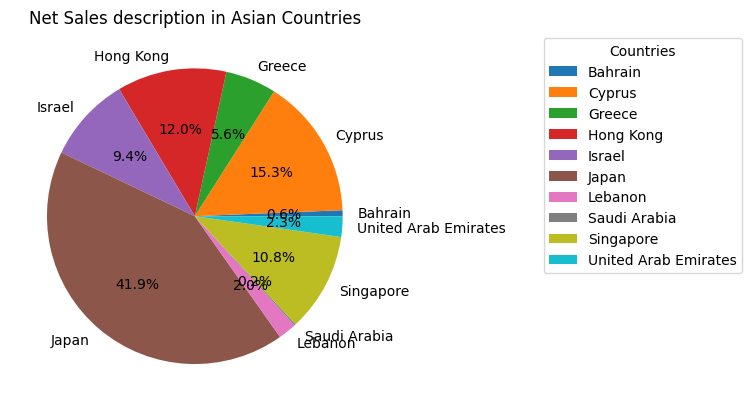

In [ ]:
plt.pie(country_sales_percentage,labels=country_sales_percentage.index,autopct='%1.1f%%')

plt.legend(loc = 'upper right',title="Countries",bbox_to_anchor=(1.5,0,0.5,1))
plt.title("Net Sales description in Asian Countries")

plt.show()

This chart shows the percentage distribution of net sales across Asian countries.

 -Japan holds the largest share at 41.9%, indicating its significant contribution to sales in the region.

 -Cyprus ranks second with 15.3%, Singapore at 10.8%.


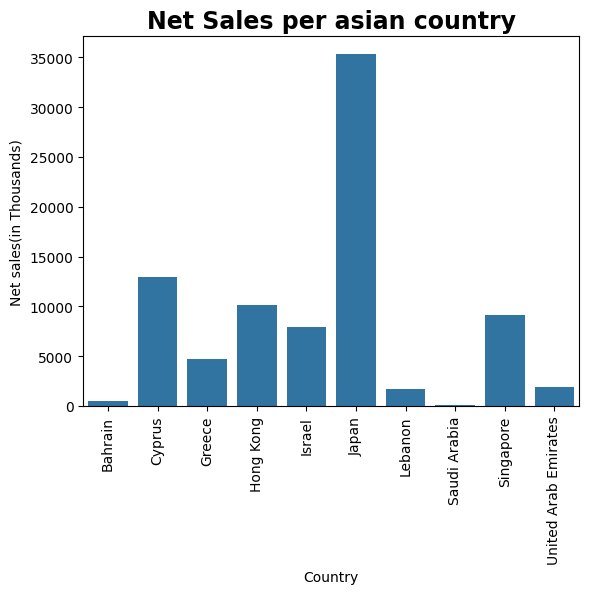

In [ ]:
sns.barplot(data=the_total_net_sales_per_country)
plt.title("Net Sales per asian country",fontsize=17,fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Net sales(in Thousands)")
plt.xticks(rotation=90)
plt.show()

*Most* purchased country is Japan

In [ ]:
The_best_purchased_country_in_asian=the_total_net_sales_per_country.idxmax()
print(The_best_purchased_country_in_asian)

Japan


In [ ]:
df_asian[df_asian["Country"]=="Japan"].groupby("Country")["net sales"].sum()


,net sales
Country,
Japan,35340.62


In [ ]:
df_asian[df_asian["Country"]=="Japan"].groupby("Country")["net sales"].max()

,net sales
Country,
Japan,3794.4


Least purchasing country

In [ ]:
The_Minimum_purchased_asian_country=the_total_net_sales_per_country.idxmin()
print(The_Minimum_purchased_asian_country)

Saudi Arabia


In [ ]:
df_asian[df_asian["Country"]=="Saudi Arabia"].groupby("Country")["net sales"].sum()

,net sales
Country,
Saudi Arabia,131.17


In [ ]:
df_asian["Month"].dtypes

period[M]

In [ ]:
df_asian["Month"]=df_asian["Month"].dt.to_timestamp()

<ipython-input-99-fc7493a1536b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asian["Month"]=df_asian["Month"].dt.to_timestamp()


In [ ]:
df_asian["Month"].dtypes

dtype('<M8[ns]')

In [ ]:
asian_countrier_net_sales_change_per_month=df_asian.groupby("Month")["net sales"].sum()

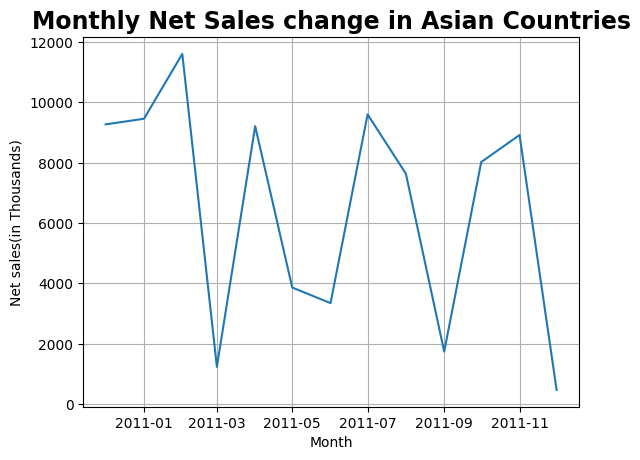

In [ ]:
sns.lineplot(asian_countrier_net_sales_change_per_month)
plt.title("Monthly Net Sales change in Asian Countries",fontsize=17,fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Net sales(in Thousands)")
plt.grid()
plt.show()


 This chart shows the monthly net sales changes in Asian countries.
 The sales show clear fluctuations throughout the year, with noticeable peaks and drops.

 The highest sales point was at the beginning of the year (January), while there were significant drops in May and september and December.


 These fluctuations might be tied to seasonal events or economic factors affecting demand

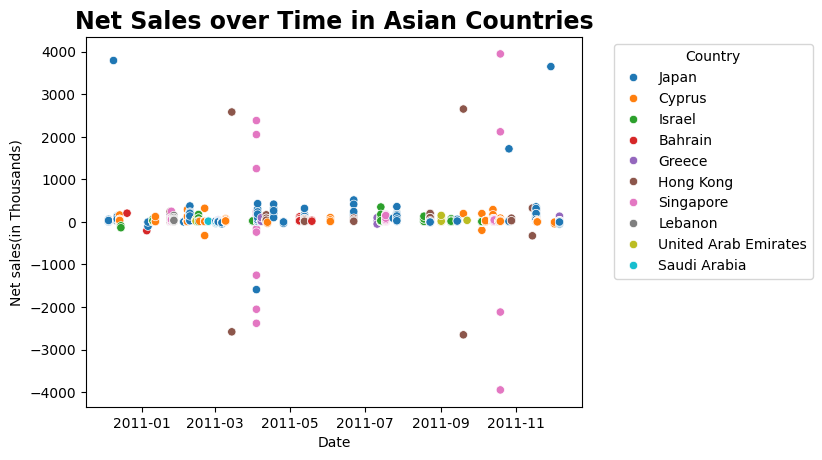

In [ ]:
sns.scatterplot(x="Date",y="net sales",data=df_asian,hue="Country")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",title="Country")
plt.title("Net Sales over Time in Asian Countries",fontsize=17,fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Net sales(in Thousands)")
plt.show()

- The chart shws the distribution of net sales over time in Asian countries, the presence of both positive and negative values indicates returned or canceled orders during certain periods

-The spread of points suggests significant variation in net sales volume among Asian countries.


 Japan has the highest values among the Asian countries, as evident from the distribution.




In [ ]:
df_asian[df_asian["Country"]=="Japan"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,15.30,2010-12-05,15:46:00,2010-12-01,Sunday
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763.0,Japan,5.04,2010-12-05,15:46:00,2010-12-01,Sunday
9785,537218,22716,CARD CIRCUS PARADE,12,2010-12-05 15:46:00,0.42,12763.0,Japan,5.04,2010-12-05,15:46:00,2010-12-01,Sunday
9786,537218,22983,CARD BILLBOARD FONT,12,2010-12-05 15:46:00,0.42,12763.0,Japan,5.04,2010-12-05,15:46:00,2010-12-01,Sunday
9787,537218,22030,SWALLOWS GREETING CARD,12,2010-12-05 15:46:00,0.42,12763.0,Japan,5.04,2010-12-05,15:46:00,2010-12-01,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
530276,C580832,21731,RED TOADSTOOL LED NIGHT LIGHT,-2,2011-12-06 11:40:00,1.45,12753.0,Japan,-2.90,2011-12-06,11:40:00,2011-12-01,Tuesday
530277,C580832,23480,MINI LIGHTS WOODLAND MUSHROOMS,-15,2011-12-06 11:40:00,3.29,12753.0,Japan,-49.35,2011-12-06,11:40:00,2011-12-01,Tuesday
530278,C580832,22466,FAIRY TALE COTTAGE NIGHT LIGHT,-17,2011-12-06 11:40:00,1.65,12753.0,Japan,-28.05,2011-12-06,11:40:00,2011-12-01,Tuesday
530279,C580832,23084,RABBIT NIGHT LIGHT,-7,2011-12-06 11:40:00,1.79,12753.0,Japan,-12.53,2011-12-06,11:40:00,2011-12-01,Tuesday


In [ ]:
df_asian[df_asian["Country"]=="Japan"]["CustomerID"].nunique()

8

In [ ]:
Total_Japan_purchases_each_month=df_asian[df_asian["Country"]=="Japan"].groupby("Month")["net sales"].sum()

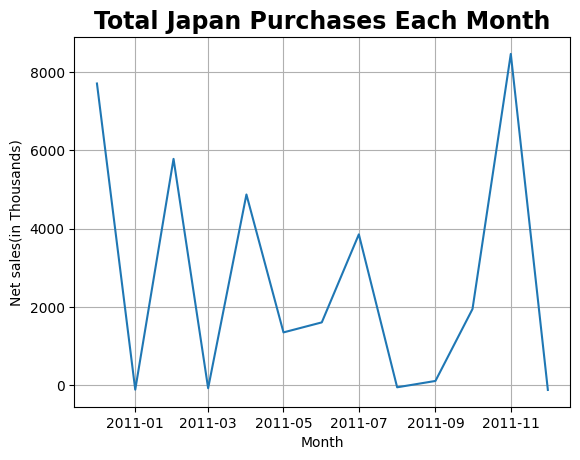

In [ ]:
sns.lineplot(data=Total_Japan_purchases_each_month)
plt.title("Total Japan Purchases Each Month",fontsize=17,fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Net sales(in Thousands)")
plt.grid()
plt.show()

#We want to see the most purchased customer in Asian country

In [ ]:
net_sales_for_each_customer=df_asian.groupby("CustomerID")["net sales"].sum()

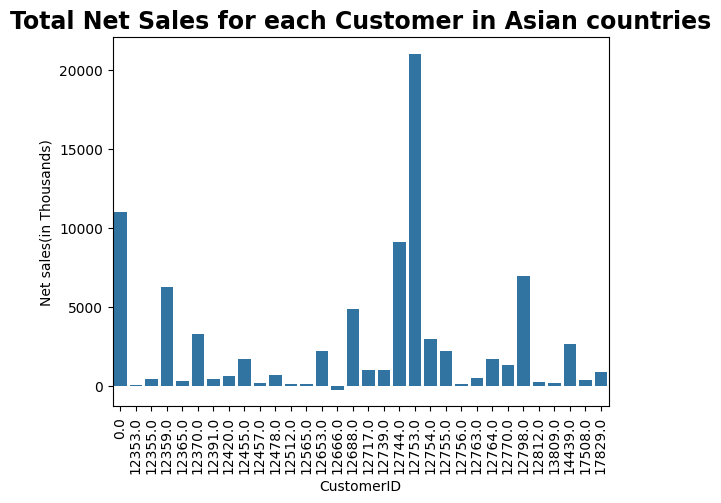

In [ ]:
sns.barplot(net_sales_for_each_customer)
plt.title("Total Net Sales for each Customer in Asian countries",fontsize=17,fontweight="bold")
plt.xlabel("CustomerID")
plt.ylabel("Net sales(in Thousands)")
plt.xticks(rotation=90)
plt.show()


the chart shows the total net sales for each customer in Asian countries

the majority of customers have sales below 5000.



#Customer distribution in each **country**

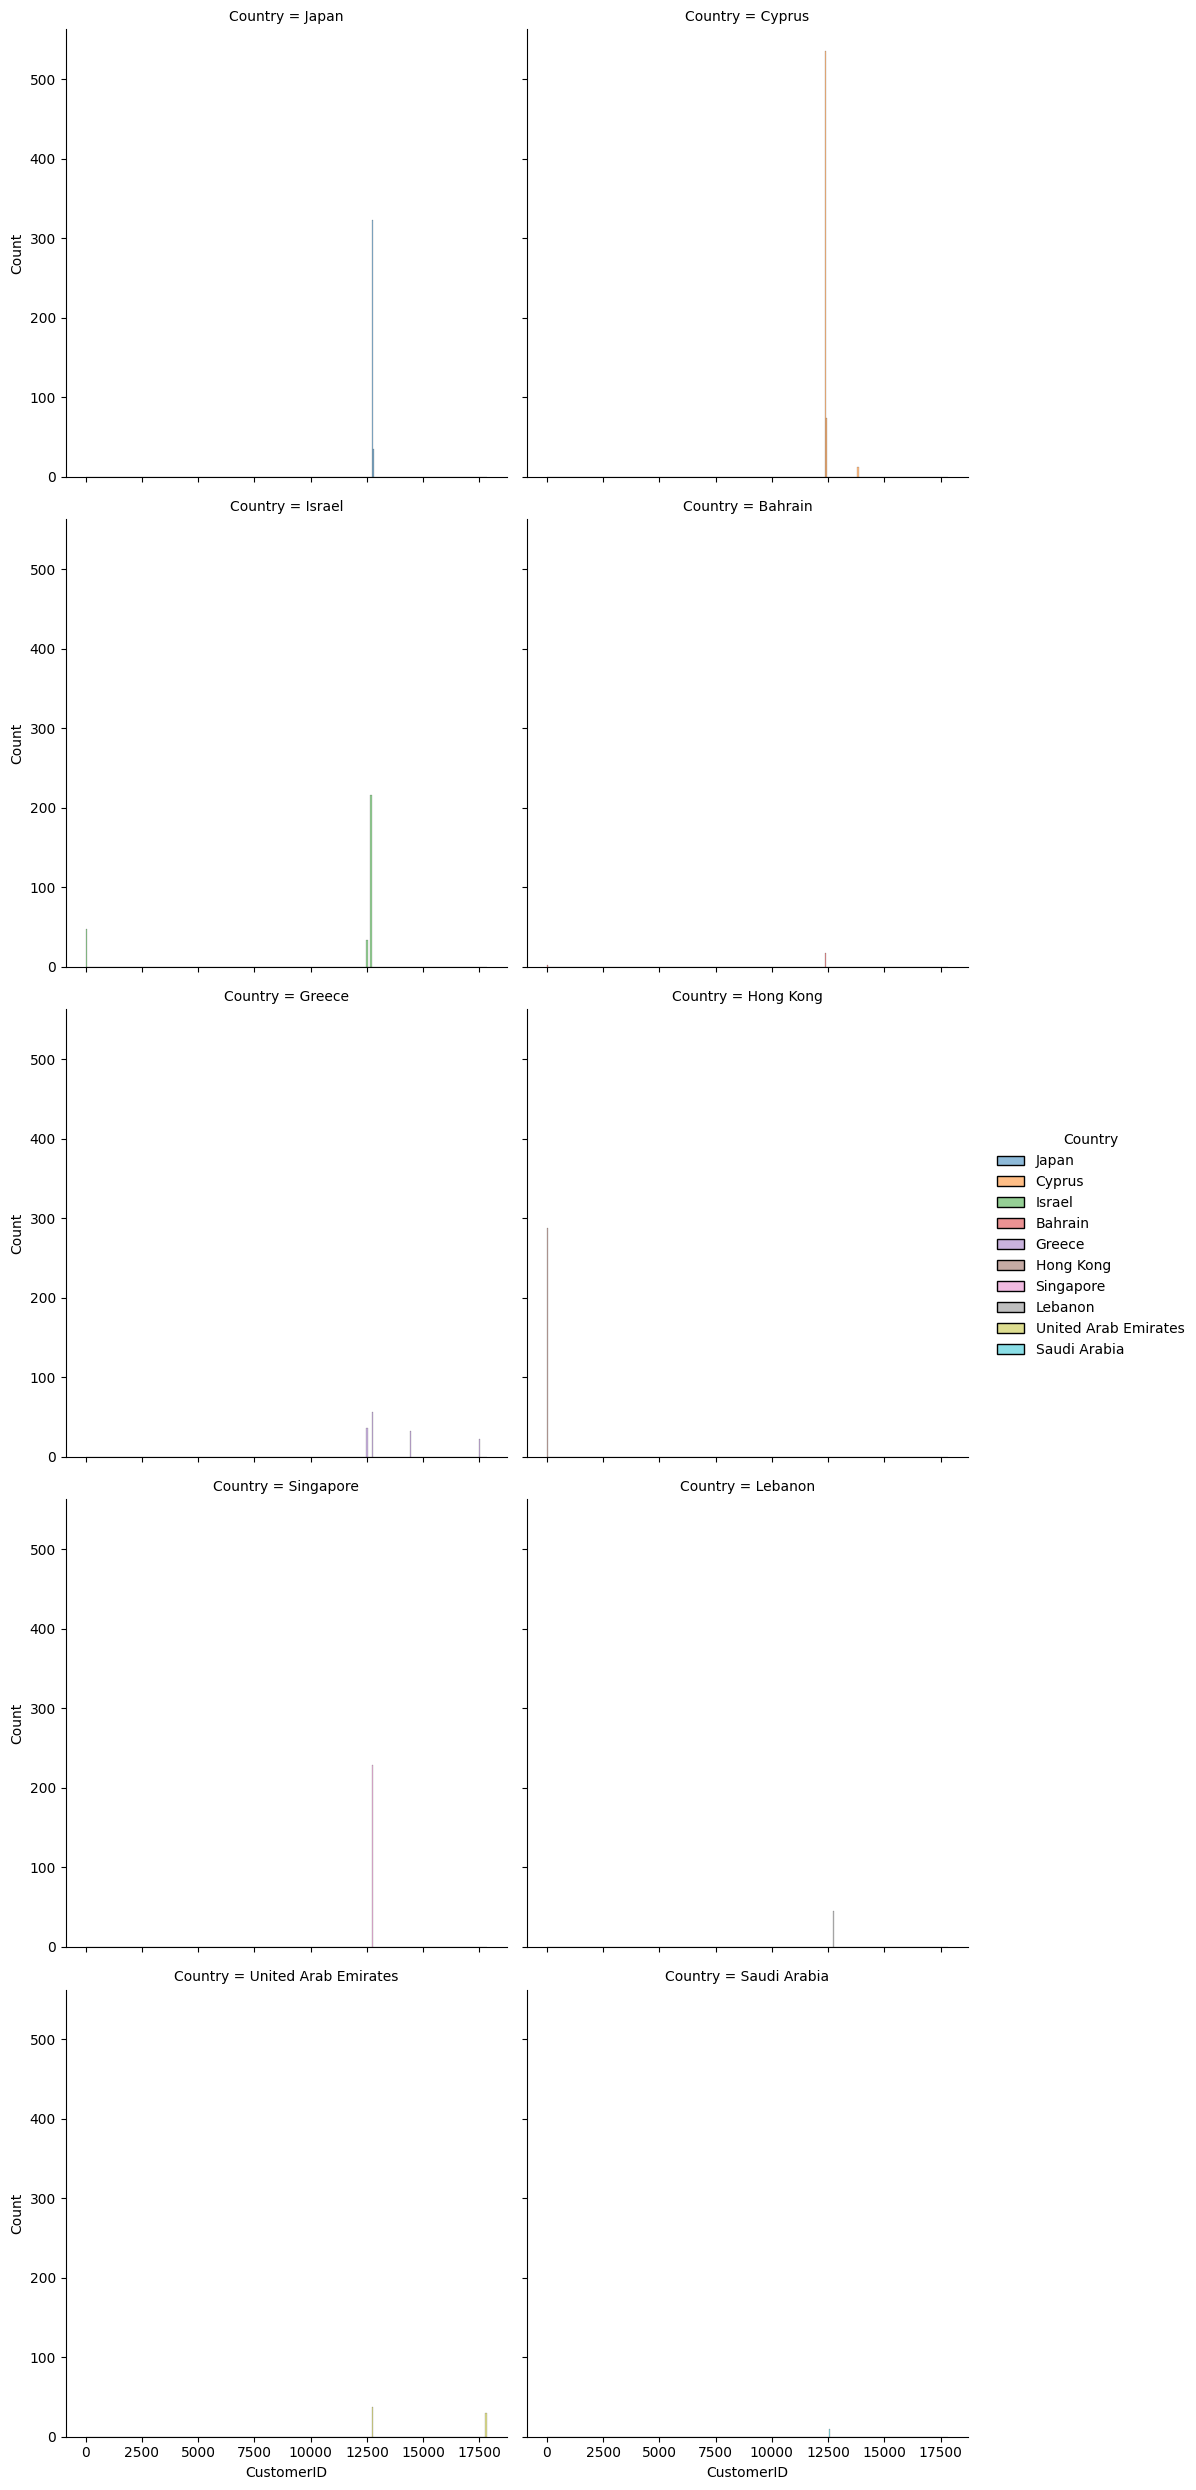

In [ ]:
sns.displot(data=df_asian,x="CustomerID",hue="Country",col="Country",col_wrap=2)

In [ ]:
top_customer=df_asian.groupby(["Country","CustomerID"])["net sales"].sum().reset_index()
top_customer=top_customer.sort_values(by=(["Country", "net sales"]),ascending=[True,False])
top_customer=top_customer.groupby("Country").head(3)
top_customer

,Country,CustomerID,net sales
2,Bahrain,12355.0,459.40
1,Bahrain,12353.0,89.00
0,Bahrain,0.0,0.00
3,Cyprus,12359.0,6245.53
5,Cyprus,12370.0,3268.49
8,Cyprus,12455.0,1698.90
13,Greece,14439.0,2661.24
12,Greece,12717.0,980.98
11,Greece,12478.0,680.99
15,Hong Kong,0.0,10117.04


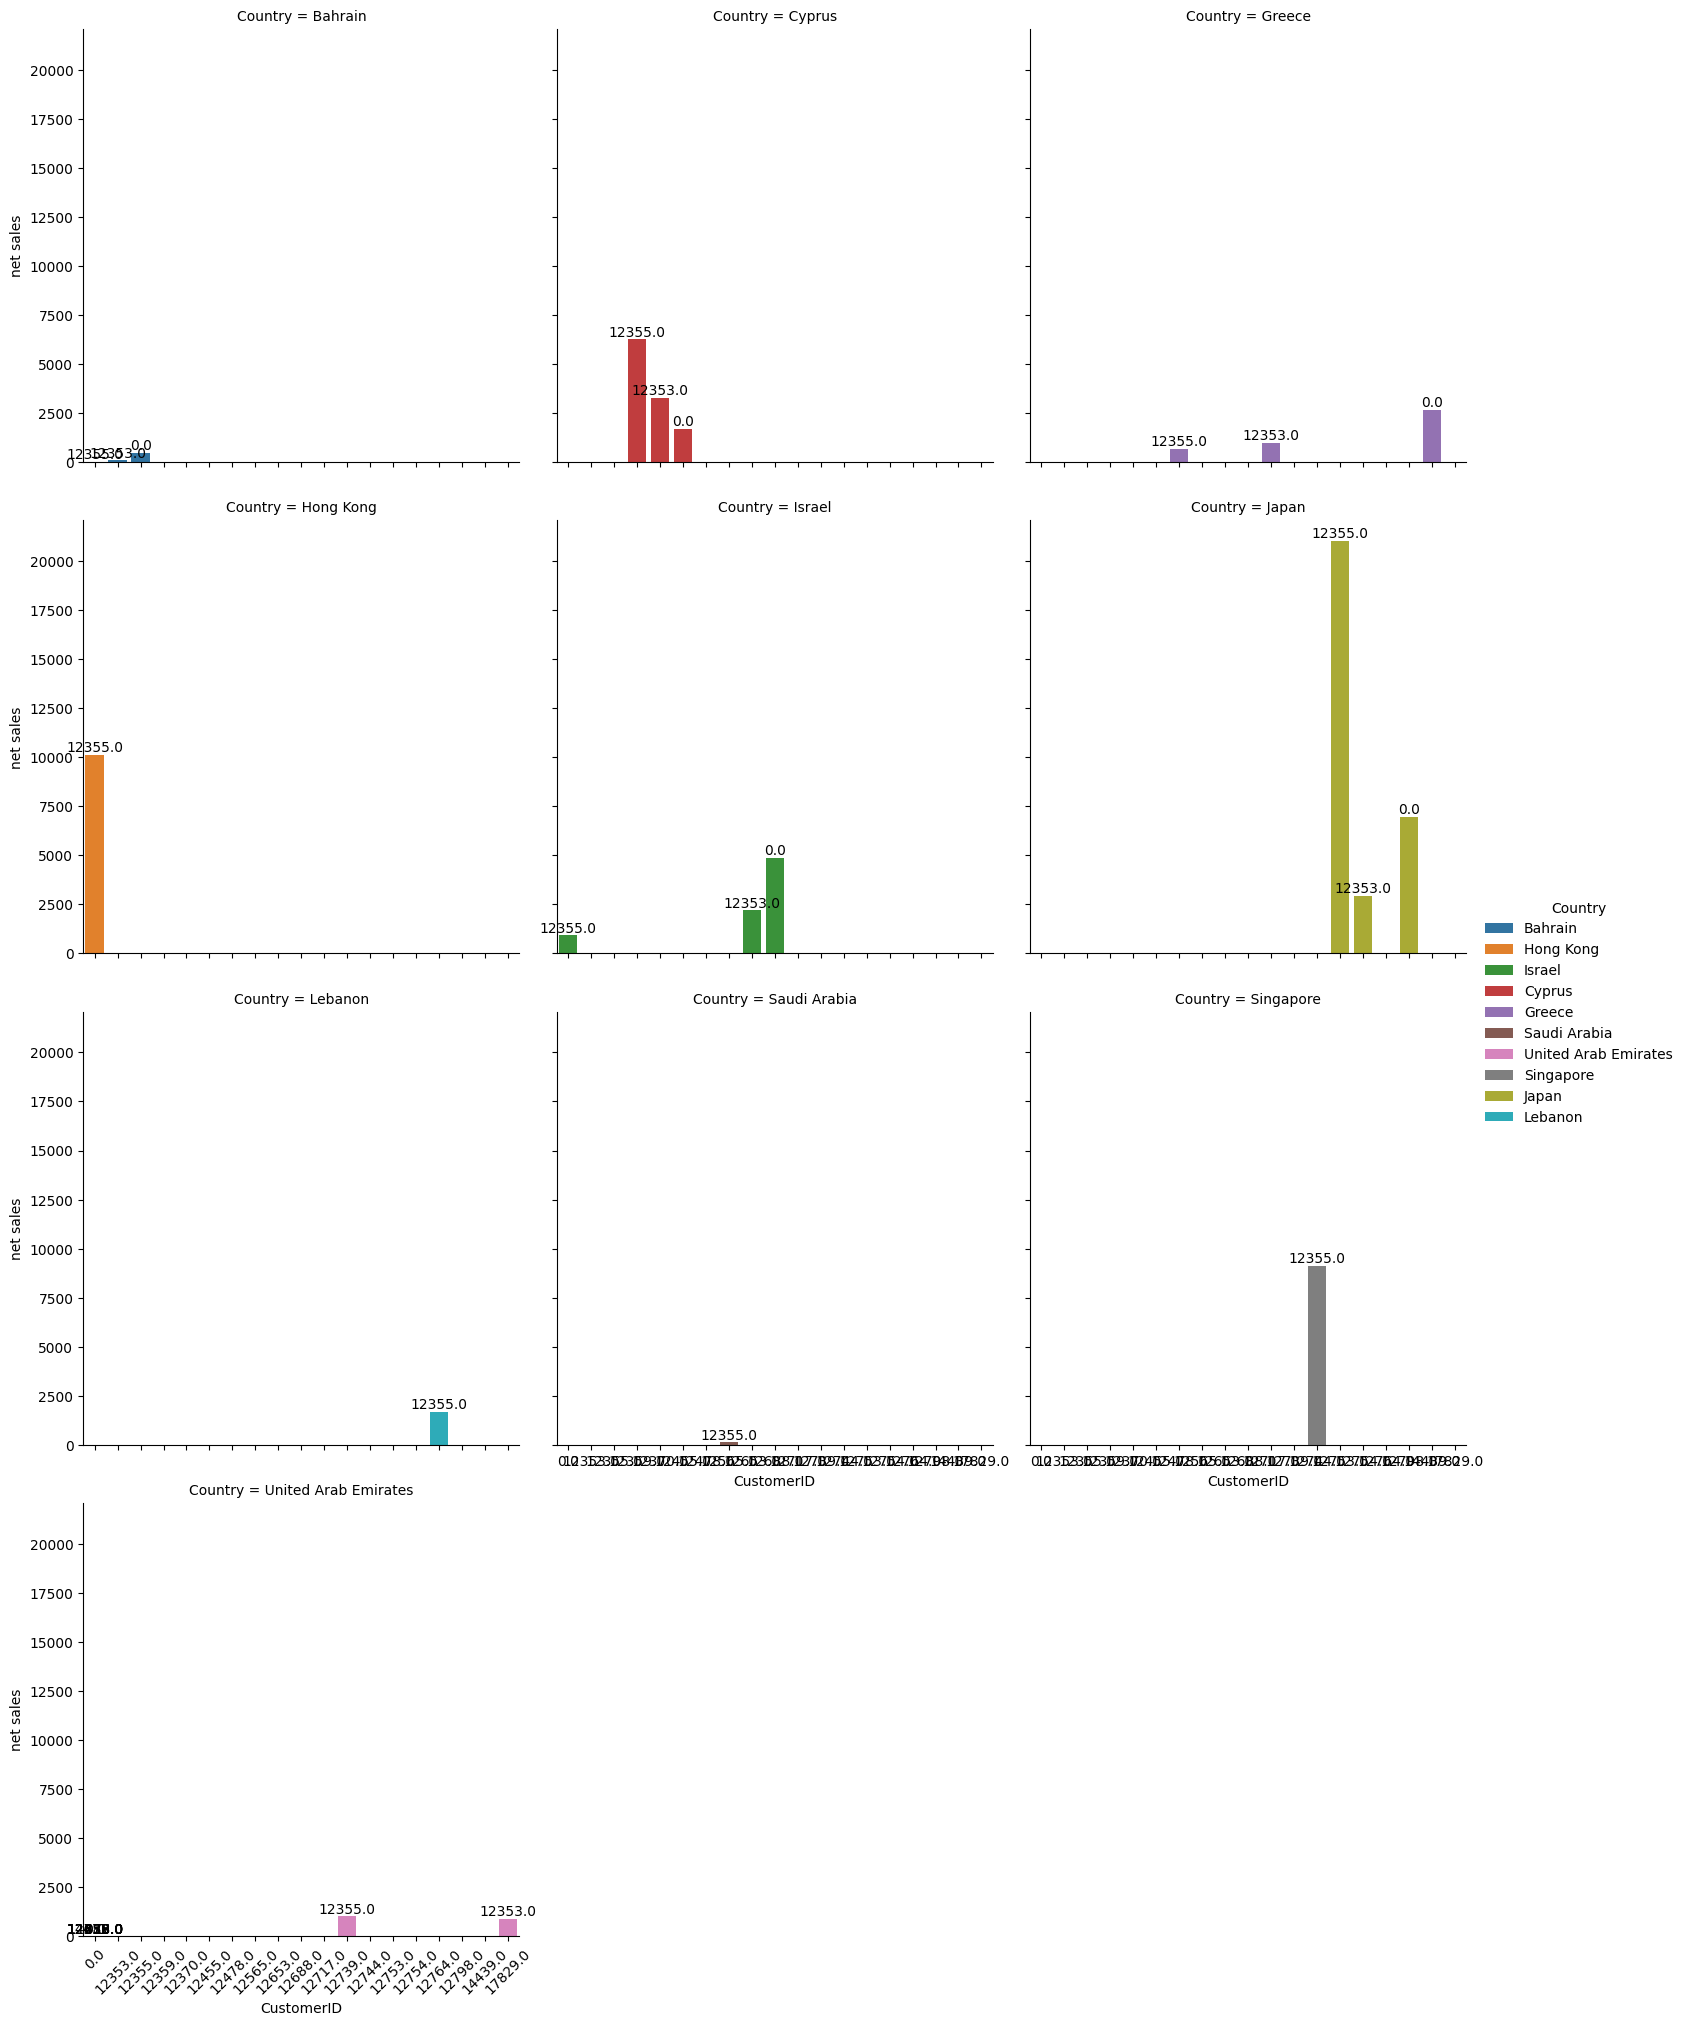

In [ ]:
f=sns.catplot(data=top_customer,x="CustomerID",y="net sales",col="Country",kind="bar",col_wrap=3,hue="Country")
plt.xticks(rotation=45)
for ax in f.axes.flat:
  for bar,label in zip(ax.patches,top_customer["CustomerID"]):
    bar_x=bar.get_x() + bar.get_width()/2
    bar_height=bar.get_height()
    ax.annotate(f"{label}",(bar_x,bar_height),ha='center',va='bottom')

plt.show()




In [ ]:
df_asian[df_asian["Country"]=="Japan"]["CustomerID"].nunique()

8

In [ ]:
df_asian[df_asian["Country"]=="Japan"]["CustomerID"].value_counts().sum()

358

In [ ]:
df_asian[df_asian["Country"]=="Singapore"]["CustomerID"].nunique()

1

In [ ]:
df_asian[df_asian["Country"]=="Singapore"]["CustomerID"].value_counts().sum()

229

In [ ]:

df_asian[df_asian["Country"]=="Greece"]["CustomerID"].nunique()

4

In [ ]:
df_asian[df_asian["Country"]=="Greece"]["CustomerID"].value_counts()

,count
CustomerID,
12717.0,56
12478.0,36
14439.0,32
17508.0,22


In [ ]:
df_asian.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,15.3,2010-12-05,15:46:00,2010-12-01,Sunday


Most sold product

In [ ]:
the_best_prouduct_have_net_sales=df_asian.groupby("StockCode")["net sales"].sum()

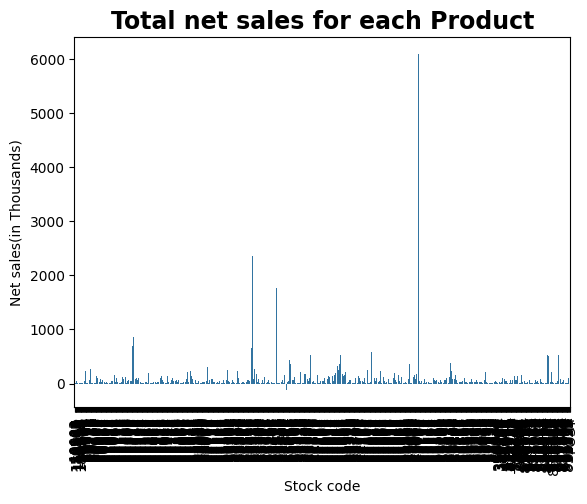

In [ ]:
sns.barplot(the_best_prouduct_have_net_sales)
plt.title("Total net sales for each Product",fontsize=17,fontweight="bold")
plt.xlabel("Stock code")
plt.ylabel("Net sales(in Thousands)")
plt.xticks(rotation=90)
plt.show()


In [ ]:
the_best_prouduct_have_net_saless=df_asian.groupby("StockCode")["net sales"].sum().nlargest(20)

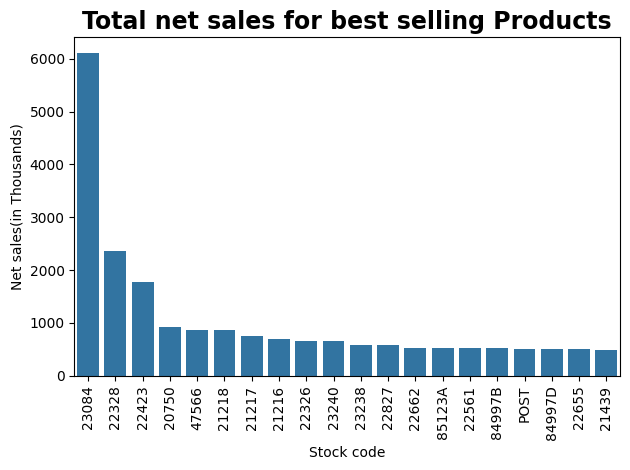

In [ ]:
sns.barplot(the_best_prouduct_have_net_saless)
plt.title("Total net sales for best selling Products",fontsize=17,fontweight="bold")
plt.xlabel("Stock code")
plt.ylabel("Net sales(in Thousands)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



 The chart shows the total net sales for the best products in Asian countries.

The product with the stock code "23084" achieves the highest sales compared to other products.

 Sales drop significantly after the top product, indicating that a few products have a major impact on revenue compared to the rest.


In [ ]:
df_asian[df_asian['StockCode']=="23084"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
235990,557670,23084,RABBIT NIGHT LIGHT,288,2011-06-22 10:11:00,1.79,12798.0,Japan,515.52,2011-06-22,10:11:00,2011-06-01,Wednesday
420062,572869,23084,RABBIT NIGHT LIGHT,960,2011-10-26 13:21:00,1.79,12798.0,Japan,1718.40,2011-10-26,13:21:00,2011-10-01,Wednesday
475865,576923,23084,RABBIT NIGHT LIGHT,120,2011-11-17 10:52:00,1.79,12753.0,Japan,214.80,2011-11-17,10:52:00,2011-11-01,Thursday
511421,579498,23084,RABBIT NIGHT LIGHT,2040,2011-11-29 15:52:00,1.79,12798.0,Japan,3651.60,2011-11-29,15:52:00,2011-11-01,Tuesday
529767,580752,23084,RABBIT NIGHT LIGHT,6,2011-12-06 09:56:00,2.08,12478.0,Greece,12.48,2011-12-06,09:56:00,2011-12-01,Tuesday
530279,C580832,23084,RABBIT NIGHT LIGHT,-7,2011-12-06 11:40:00,1.79,12753.0,Japan,-12.53,2011-12-06,11:40:00,2011-12-01,Tuesday


In [ ]:
print(the_best_prouduct_have_net_sales.idxmax())


23084


**Best selling product by quantity**

In [ ]:
The_most_product_selling=df_asian.groupby("StockCode")["Quantity"].sum()

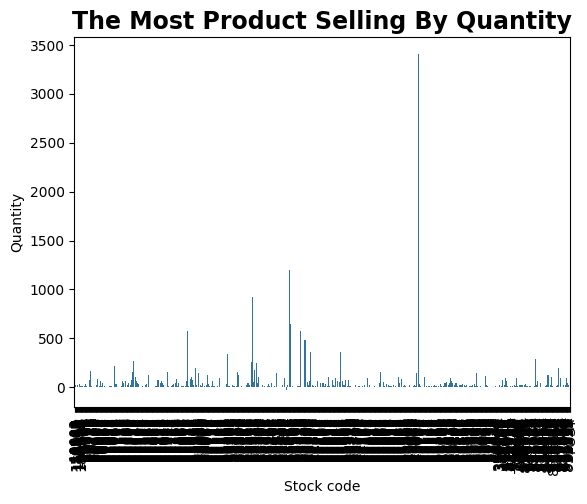

In [ ]:
sns.barplot(The_most_product_selling)
plt.title("The Most Product Selling By Quantity",fontsize=17,fontweight="bold")
plt.xlabel("Stock code")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.show()

In [ ]:
The_most_wenten_product_selling=df_asian.groupby("StockCode")["Quantity"].sum().nlargest(20)

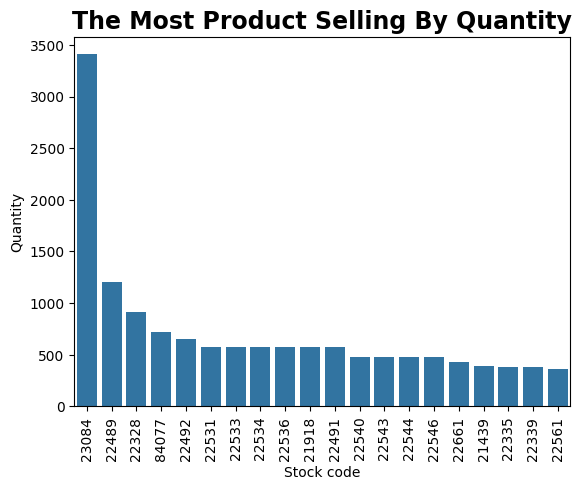

In [ ]:
sns.barplot(The_most_wenten_product_selling)
plt.title("The Most Product Selling By Quantity",fontsize=17,fontweight="bold")
plt.xlabel("Stock code")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.show()

The chart highlights the most sold products by quantity.


The product with stock code “23084” is the top seller with a significant margin over other products.


In [ ]:
print(The_most_product_selling.idxmax())

23084


In [ ]:
df_asian.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,15.3,2010-12-05,15:46:00,2010-12-01,Sunday


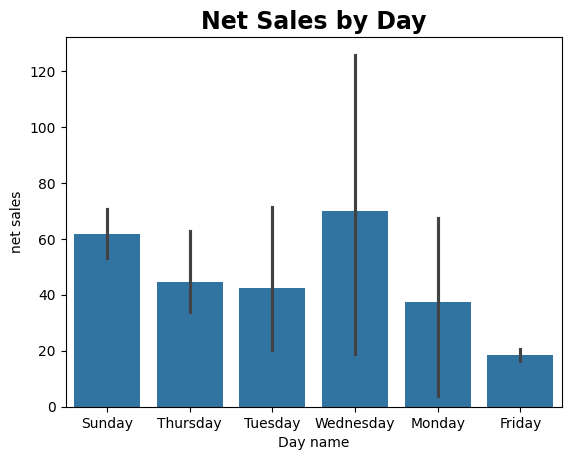

In [ ]:
sns.barplot(data=df_asian,x="Day name",y="net sales")
plt.title("Net Sales by Day",fontsize=17,fontweight="bold")

plt.show()

The chart shows the daily net sales.

Wednesday has the highest sales compared to other days.

Friday has the lowest sales, indicating less business activity on that day.




In [ ]:
df_Non_Asian.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,2010-12-01,08:45:00,2010-12,Wednesday


In [ ]:
df_Non_Asian["Country"].value_counts()

,count
Country,
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519
Australia,1259


In [ ]:
Total_net_sales_for_non_asian_country=df_Non_Asian["net sales"].sum()
print(Total_net_sales_for_non_asian_country)

1475523.16


In [ ]:
monthly_average_net_sales_in_non_asian=Total_net_sales_for_non_asian_country/12
print(monthly_average_net_sales_in_non_asian)

122960.26333333332


In [ ]:
Total_net_sales_for_each_non_asian_country=df_Non_Asian.groupby("Country")["net sales"].sum()

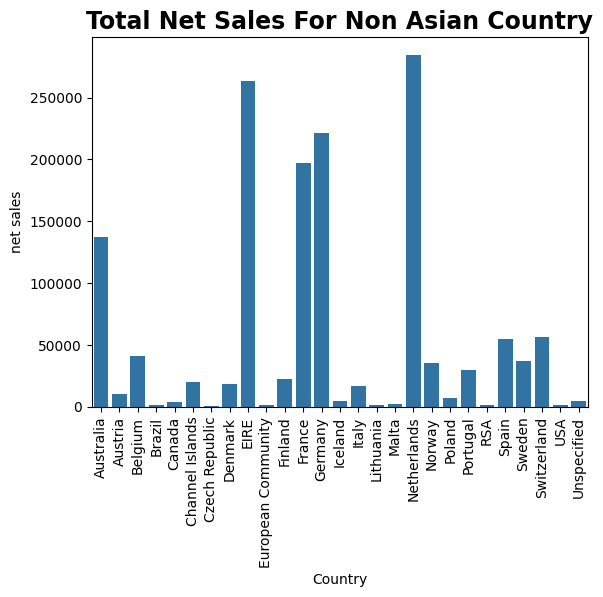

In [ ]:
sns.barplot(Total_net_sales_for_each_non_asian_country)
plt.title("Total Net Sales For Non Asian Country",fontsize=17,fontweight="bold")
plt.xticks(rotation=90)
plt.show()

The chart shows the Total Net sales for Non_Asian countries .

Netherlands has the highest sales then EIRE and Germany ang France



Text(0.5, 1.0, 'Net sales over Time for Non Asian Countries')

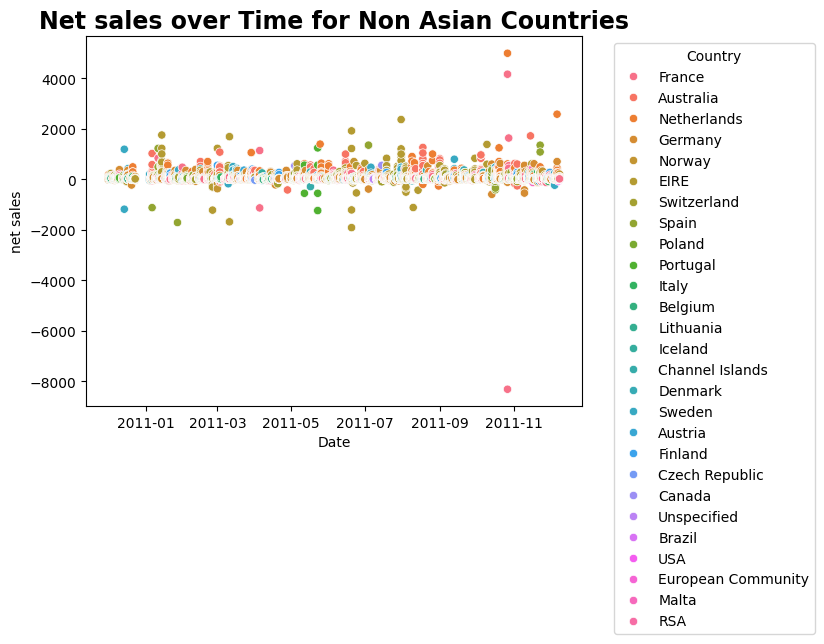

In [ ]:
sns.scatterplot(data=df_Non_Asian,x="Date",y="net sales",hue="Country")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",title="Country")
plt.title("Net sales over Time for Non Asian Countries",fontsize=17,fontweight="bold")



The chart shows the changes in net sales over time for Non_Asian countries

Some Negative Points indicate large cancellation or returns during those period

In [ ]:
Non_Asian_countries_sales_change_by_month=df_Non_Asian.groupby("Month")["net sales"].sum()

In [ ]:
The_selling_country_in_non_asian=df_Non_Asian.groupby("Country")["net sales"].sum()
Total_net_sales_for_non_asian_country
country_sales_percentage_for_non_asian=(The_selling_country_in_non_asian/Total_net_sales_for_non_asian_country)*100

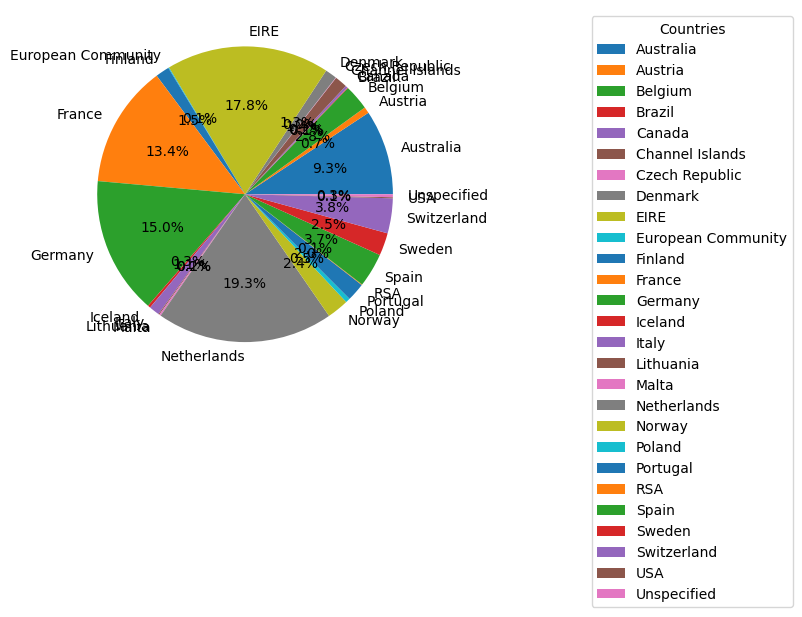

In [ ]:
plt.pie(country_sales_percentage_for_non_asian,labels=country_sales_percentage_for_non_asian.index,autopct='%1.1f%%')

plt.legend(loc = 'upper right',title="Countries",bbox_to_anchor=(1.5,0,0.5,1))

plt.show()

This pie chart shows the sale percentage distribution among Non_Asian Countries .
The Netherlands is the largest contributor with 19.3%
then EiIRE 17.8%


In [ ]:
the_cusomer_id_most_purchased=df_Non_Asian.groupby("CustomerID")["net sales"].sum()

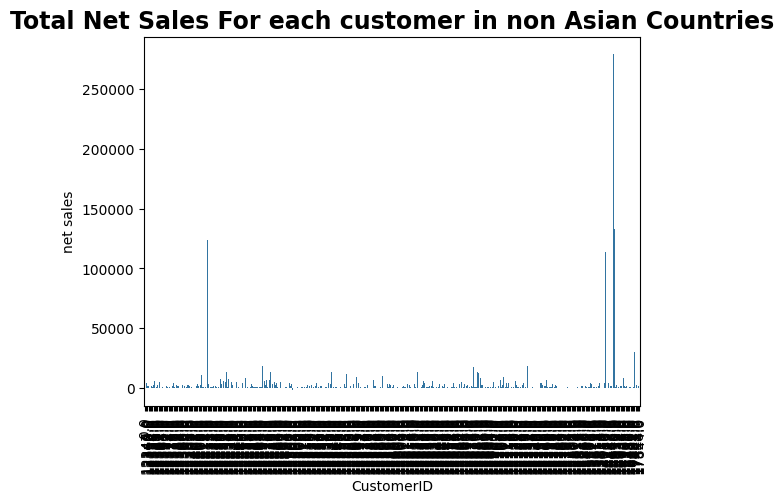

In [ ]:
sns.barplot(the_cusomer_id_most_purchased)
plt.title("Total Net Sales For each customer in non Asian Countries",fontsize=17,fontweight="bold")
plt.xticks(rotation=90)
plt.show()

In [ ]:
the_top_ten_cusomer_id_most_purchased=df_Non_Asian.groupby("CustomerID")["net sales"].sum().nlargest(10)

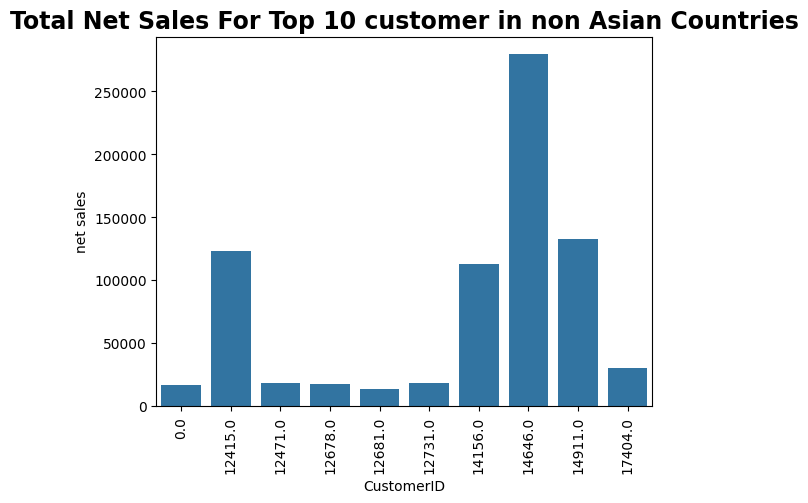

In [ ]:
sns.barplot(the_top_ten_cusomer_id_most_purchased)
plt.title("Total Net Sales For Top 10 customer in non Asian Countries",fontsize=17,fontweight="bold")
plt.xticks(rotation=90)
plt.show()


This bar chart shows the total net sales for each customer in non-Asian countries,it is evident that customer 14646.0 has the highest contribution with over 250,000 of net sales.


Other customers have significantly lower contributions

In [ ]:
print(the_cusomer_id_most_purchased.idxmax())

14646.0


In [ ]:
df_Non_Asian[df_Non_Asian["CustomerID"]==14646.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,2010-12-20 10:09:00,0.29,14646.0,Netherlands,3.48,2010-12-20,10:09:00,2010-12,Monday
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,2010-12-20 10:09:00,0.29,14646.0,Netherlands,3.48,2010-12-20,10:09:00,2010-12,Monday
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2010-12-20 10:09:00,4.95,14646.0,Netherlands,9.90,2010-12-20,10:09:00,2010-12,Monday
37955,539491,21931,JUMBO STORAGE BAG SUKI,1,2010-12-20 10:09:00,1.95,14646.0,Netherlands,1.95,2010-12-20,10:09:00,2010-12,Monday
37956,539491,22613,PACK OF 20 SPACEBOY NAPKINS,2,2010-12-20 10:09:00,0.85,14646.0,Netherlands,1.70,2010-12-20,10:09:00,2010-12,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534958,581176,22908,PACK OF 20 NAPKINS RED APPLES,96,2011-12-07 15:19:00,0.72,14646.0,Netherlands,69.12,2011-12-07,15:19:00,2011-12,Wednesday
534959,581176,22907,PACK OF 20 NAPKINS PANTRY DESIGN,96,2011-12-07 15:19:00,0.72,14646.0,Netherlands,69.12,2011-12-07,15:19:00,2011-12,Wednesday
534960,581176,22029,SPACEBOY BIRTHDAY CARD,72,2011-12-07 15:19:00,0.36,14646.0,Netherlands,25.92,2011-12-07,15:19:00,2011-12,Wednesday
534961,581176,22712,CARD DOLLY GIRL,72,2011-12-07 15:19:00,0.36,14646.0,Netherlands,25.92,2011-12-07,15:19:00,2011-12,Wednesday


The product that achieved the highest sales in terms of quantity in non-Asian countries

> Add blockquote



In [ ]:
the_most_product_selling_in_non_asian_country=df_Non_Asian.groupby("StockCode")["Quantity"].sum()

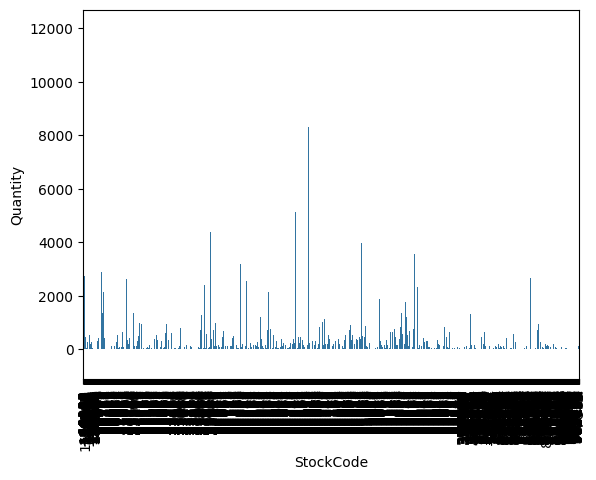

In [ ]:
sns.barplot(the_most_product_selling_in_non_asian_country)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(the_most_product_selling_in_non_asian_country.idxmax())

23084


In [ ]:
top_10_product_selling=the_most_product_selling_in_non_asian_country.nlargest(10)
print(top_10_product_selling)

StockCode
23084    12071
22492    11868
21212    11265
22629     8302
22630     7077
21731     6620
22326     6582
22554     5129
22551     4904
84077     4800
Name: Quantity, dtype: int64


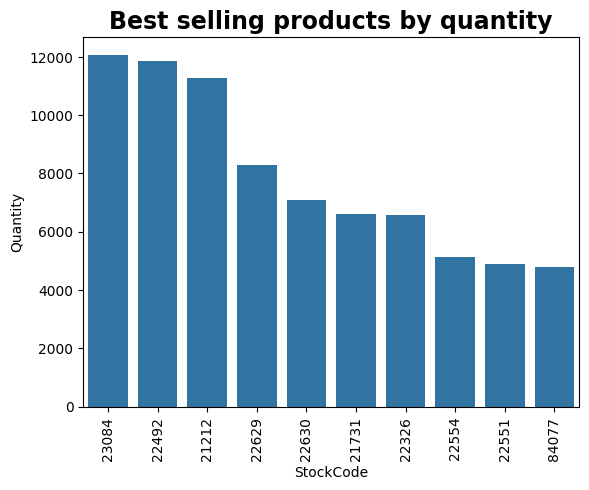

In [ ]:
sns.barplot(top_10_product_selling)
plt.title("Best selling products by quantity",fontsize=17,fontweight="bold")
plt.xticks(rotation=90)
plt.show()


This bar chart shows the best selling product by Quantities in Non_Asian Countries


The Stockcode 23084 and 22492 and 21212 have the most Quantities selling

In [ ]:
max_Qantity_of_product_selling_in_non_asian_country=df_Non_Asian.groupby("StockCode")["Quantity"].sum().max()
print(max_Qantity_of_product_selling_in_non_asian_country)

12071


In [ ]:
df_Non_Asian[df_Non_Asian["StockCode"]=="23084"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
186074,552844,23084,RABBIT NIGHT LIGHT,18,2011-05-11 14:37:00,2.08,12649.0,Germany,37.44,2011-05-11,14:37:00,2011-05,Wednesday
186108,552851,23084,RABBIT NIGHT LIGHT,120,2011-05-11 15:07:00,1.79,12731.0,France,214.80,2011-05-11,15:07:00,2011-05,Wednesday
186645,552875,23084,RABBIT NIGHT LIGHT,48,2011-05-12 09:41:00,1.79,12621.0,Germany,85.92,2011-05-12,09:41:00,2011-05,Thursday
186763,552882,23084,RABBIT NIGHT LIGHT,24,2011-05-12 10:10:00,2.08,14646.0,Netherlands,49.92,2011-05-12,10:10:00,2011-05,Thursday
187252,552956,23084,RABBIT NIGHT LIGHT,12,2011-05-12 12:34:00,2.08,12431.0,Australia,24.96,2011-05-12,12:34:00,2011-05,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534804,581171,23084,RABBIT NIGHT LIGHT,24,2011-12-07 15:02:00,1.79,12615.0,France,42.96,2011-12-07,15:02:00,2011-12,Wednesday
534952,581175,23084,RABBIT NIGHT LIGHT,1440,2011-12-07 15:16:00,1.79,14646.0,Netherlands,2577.60,2011-12-07,15:16:00,2011-12,Wednesday
535002,581179,23084,RABBIT NIGHT LIGHT,24,2011-12-07 15:43:00,1.79,12471.0,Germany,42.96,2011-12-07,15:43:00,2011-12,Wednesday
535009,581180,23084,RABBIT NIGHT LIGHT,24,2011-12-07 15:52:00,1.79,12347.0,Iceland,42.96,2011-12-07,15:52:00,2011-12,Wednesday


In [ ]:
#the description of the stockcode which have 23084 number is RABBIT NIGHT LIGHT


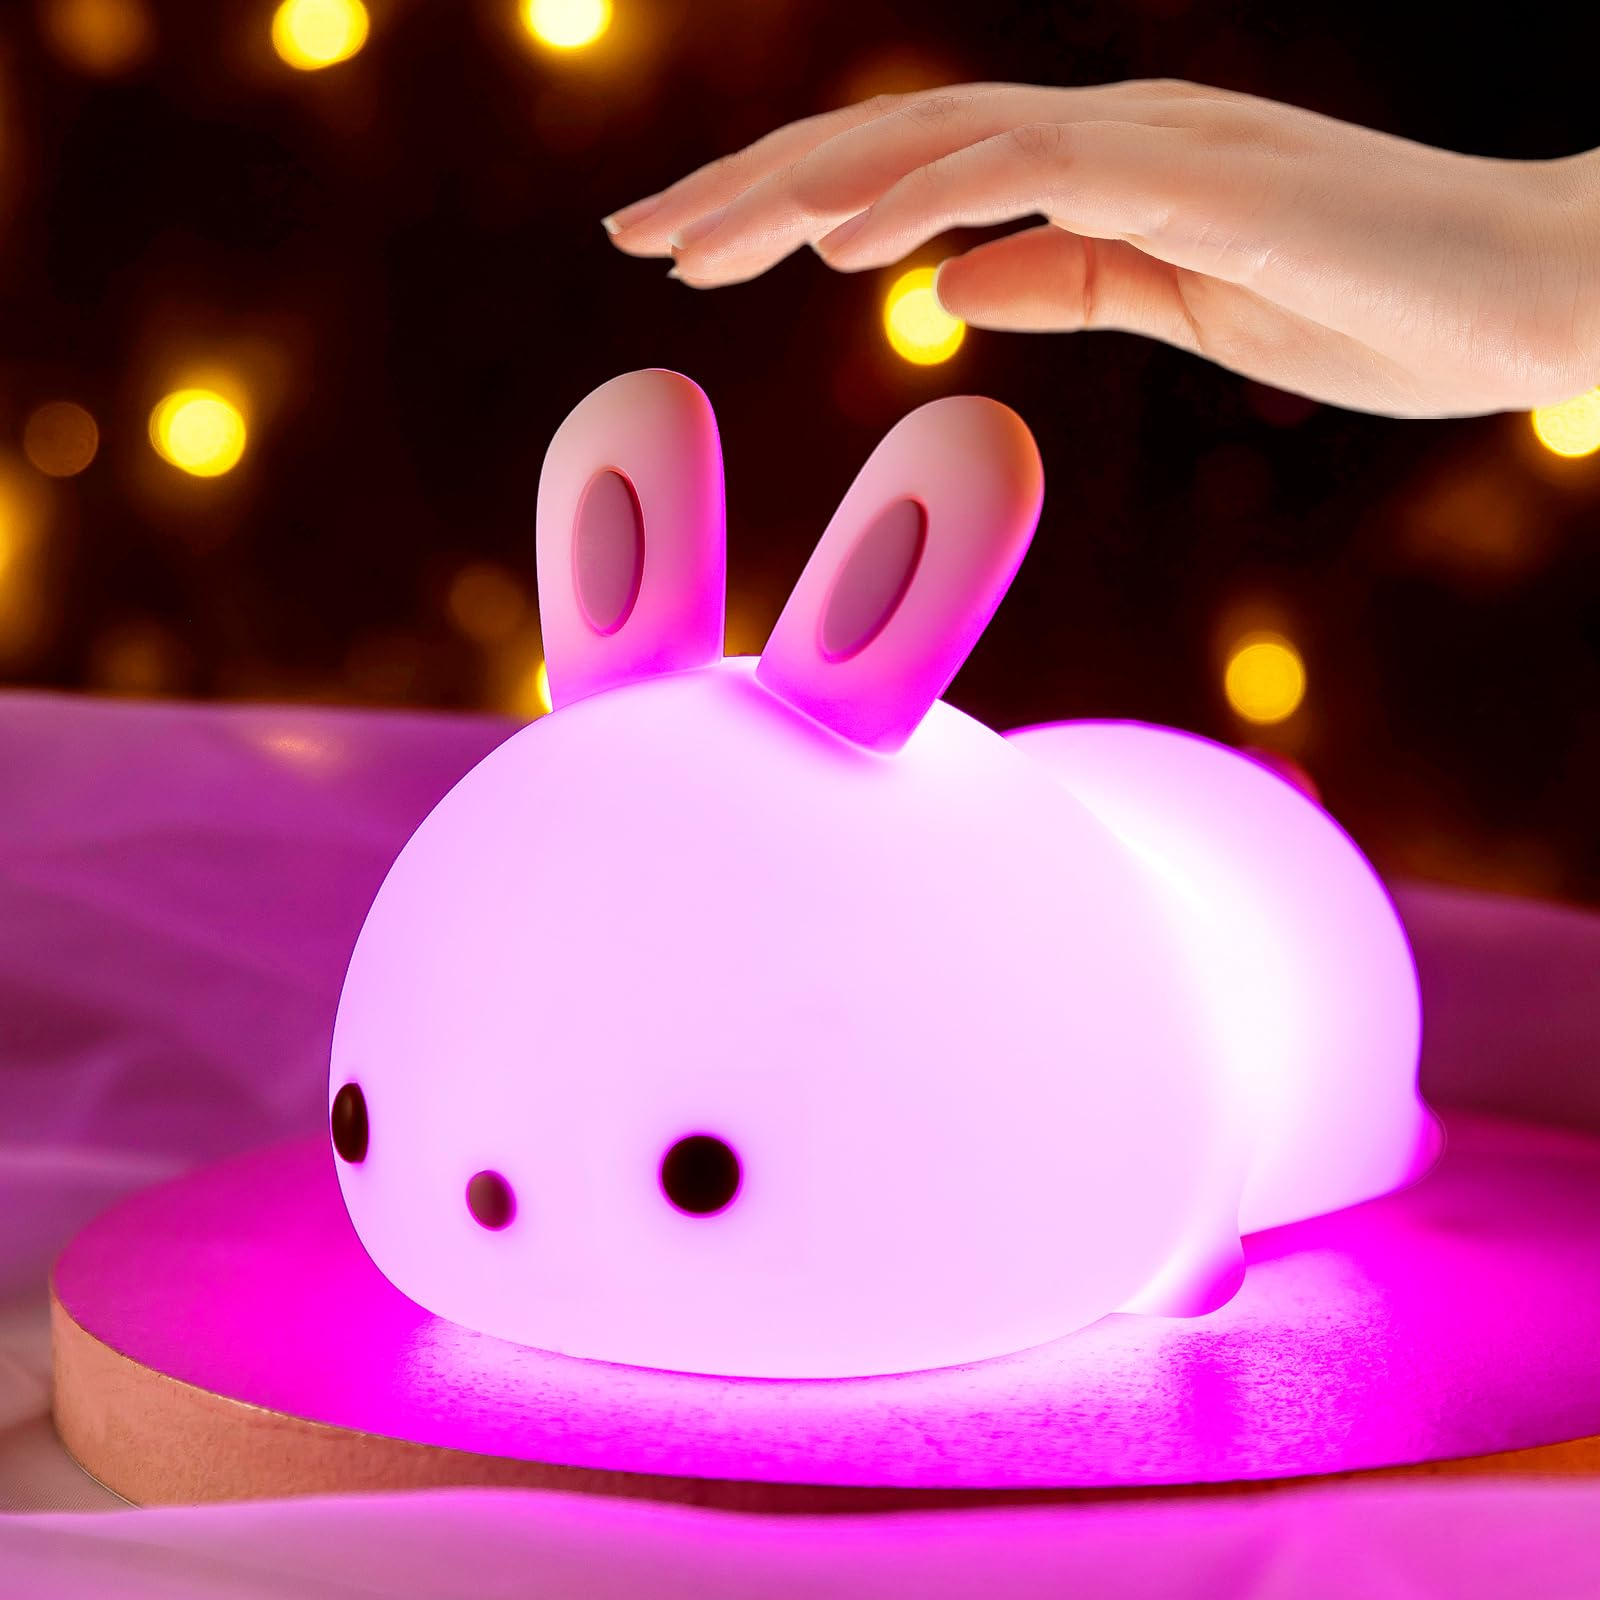

Top selling products in terms of contribution to total sales

In [ ]:

df_Non_Asian[df_Non_Asian["StockCode"]=="21212"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
1291,536532,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2010-12-01 13:24:00,0.55,12433.0,Norway,13.2,2010-12-01,13:24:00,2010-12,Wednesday
5072,536840,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2010-12-02 18:27:00,0.55,12738.0,Germany,13.2,2010-12-02,18:27:00,2010-12,Thursday
7281,537026,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-03 16:35:00,0.42,12395.0,Belgium,50.4,2010-12-03,16:35:00,2010-12,Friday
14146,537463,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2010-12-07 10:08:00,0.55,12681.0,France,13.2,2010-12-07,10:08:00,2010-12,Tuesday
19564,537868,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2010-12-08 16:49:00,0.55,12433.0,Norway,13.2,2010-12-08,16:49:00,2010-12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519598,580153,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-12-02 10:23:00,0.55,12762.0,Portugal,13.2,2011-12-02,10:23:00,2011-12,Friday
523397,580511,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-12-04 13:54:00,0.55,12560.0,Germany,13.2,2011-12-04,13:54:00,2011-12,Sunday
525802,580638,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-12-05 12:44:00,0.55,12381.0,Norway,13.2,2011-12-05,12:44:00,2011-12,Monday
529792,580753,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-12-06 10:00:00,0.55,12682.0,France,13.2,2011-12-06,10:00:00,2011-12,Tuesday


In [ ]:
The_product_that_contributed_the_most_to_the_total_sales=df_Non_Asian.groupby("StockCode")["net sales"].sum()

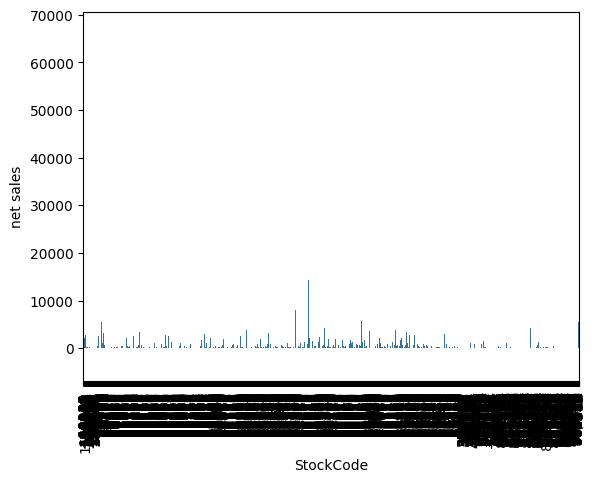

In [ ]:
sns.barplot(The_product_that_contributed_the_most_to_the_total_sales)
plt.xticks(rotation=90)
plt.show()

In [ ]:
The_twenty_product_that_contributed_the_most_to_the_total_sales=df_Non_Asian.groupby("StockCode")["net sales"].sum().nlargest(20)

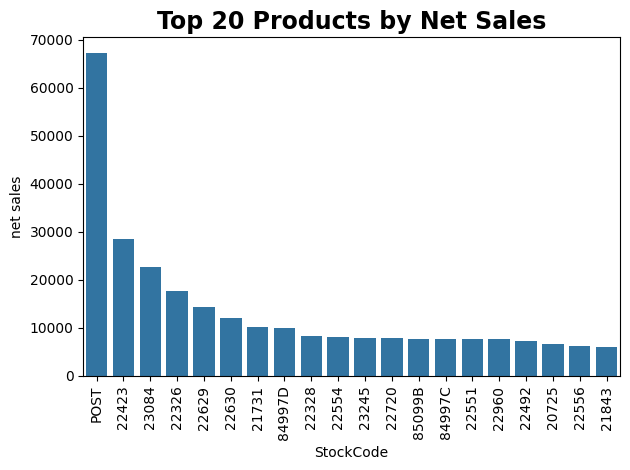

In [ ]:
sns.barplot(The_twenty_product_that_contributed_the_most_to_the_total_sales)
plt.title("The Most Net Sales Products")
plt.title("Top 20 Products by Net Sales",fontsize=17,fontweight="bold")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This chart shows the top 20 products by net sales.


It is clear that the product with the code POST is the best selling , followed by products with codes 22423 and 23084


Other products have substantially lower net sales compared to the top ones.

In [ ]:
print(The_product_that_contributed_the_most_to_the_total_sales.idxmax())

POST


#Postage refers to the shipping or delivery fees associated with sending products to customers These charges vary based on factors like the customer’s location, the quantity of items, or the delivery method

In [ ]:
df_Non_Asian[df_Non_Asian["StockCode"]=="POST"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France,54.0,2010-12-01,08:45:00,2010-12,Wednesday
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands,15.0,2010-12-01,11:27:00,2010-12,Wednesday
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany,18.0,2010-12-01,13:04:00,2010-12,Wednesday
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany,18.0,2010-12-02,18:27:00,2010-12,Thursday
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France,18.0,2010-12-03,09:51:00,2010-12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423.0,Belgium,15.0,2011-12-09,10:10:00,2011-12,Friday
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0,Germany,36.0,2011-12-09,10:13:00,2011-12,Friday
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0,Germany,18.0,2011-12-09,11:59:00,2011-12,Friday
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany,36.0,2011-12-09,12:09:00,2011-12,Friday


In [ ]:

df_Non_Asian[df_Non_Asian["StockCode"]=="22423"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
6721,536975,22423,REGENCY CAKESTAND 3 TIER,4,2010-12-03 14:04:00,12.75,14911.0,EIRE,51.0,2010-12-03,14:04:00,2010-12,Friday
7922,537065,22423,REGENCY CAKESTAND 3 TIER,2,2010-12-05 11:57:00,12.75,12567.0,France,25.5,2010-12-05,11:57:00,2010-12,Sunday
9429,537201,22423,REGENCY CAKESTAND 3 TIER,4,2010-12-05 14:19:00,12.75,12472.0,Germany,51.0,2010-12-05,14:19:00,2010-12,Sunday
12434,537378,22423,REGENCY CAKESTAND 3 TIER,12,2010-12-06 13:06:00,12.75,14911.0,EIRE,153.0,2010-12-06,13:06:00,2010-12,Monday
20104,538009,22423,REGENCY CAKESTAND 3 TIER,16,2010-12-09 12:17:00,10.95,14911.0,EIRE,175.2,2010-12-09,12:17:00,2010-12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531760,580965,22423,REGENCY CAKESTAND 3 TIER,4,2011-12-06 14:52:00,12.75,12417.0,Belgium,51.0,2011-12-06,14:52:00,2011-12,Tuesday
533645,581098,22423,REGENCY CAKESTAND 3 TIER,16,2011-12-07 11:42:00,10.95,14911.0,EIRE,175.2,2011-12-07,11:42:00,2011-12,Wednesday
534914,581175,22423,REGENCY CAKESTAND 3 TIER,32,2011-12-07 15:16:00,10.95,14646.0,Netherlands,350.4,2011-12-07,15:16:00,2011-12,Wednesday
534968,581179,22423,REGENCY CAKESTAND 3 TIER,64,2011-12-07 15:43:00,10.95,12471.0,Germany,700.8,2011-12-07,15:43:00,2011-12,Wednesday


#These countries have shipping costs.

In [ ]:
df[df["StockCode"]=="POST"].groupby("StockCode")["Country"].value_counts()

StockCode  Country             
POST       Germany                 383
           France                  311
           United Kingdom          144
           Belgium                  98
           Spain                    62
           Finland                  41
           Netherlands              39
           Switzerland              33
           Portugal                 30
           Sweden                   24
           Norway                   20
           Italy                    18
           Austria                  14
           Denmark                  14
           Poland                    5
           Greece                    4
           Malta                     4
           European Community        3
           Australia                 2
           Czech Republic            2
           Hong Kong                 2
           Canada                    1
           Cyprus                    1
           United Arab Emirates      1
Name: count, dtype: int64

Second best selling product

In [ ]:
The_second_product_that_contributed_the_most_to_the_total_sales=df_Non_Asian.groupby("StockCode")["net sales"].sum().nlargest(10)

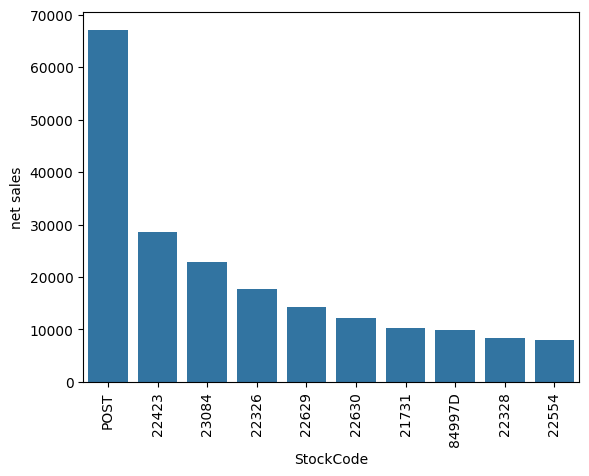

In [ ]:
sns.barplot(The_second_product_that_contributed_the_most_to_the_total_sales)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_Non_Asian[df_Non_Asian["StockCode"]=="22423"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
6721,536975,22423,REGENCY CAKESTAND 3 TIER,4,2010-12-03 14:04:00,12.75,14911.0,EIRE,51.0,2010-12-03,14:04:00,2010-12,Friday
7922,537065,22423,REGENCY CAKESTAND 3 TIER,2,2010-12-05 11:57:00,12.75,12567.0,France,25.5,2010-12-05,11:57:00,2010-12,Sunday
9429,537201,22423,REGENCY CAKESTAND 3 TIER,4,2010-12-05 14:19:00,12.75,12472.0,Germany,51.0,2010-12-05,14:19:00,2010-12,Sunday
12434,537378,22423,REGENCY CAKESTAND 3 TIER,12,2010-12-06 13:06:00,12.75,14911.0,EIRE,153.0,2010-12-06,13:06:00,2010-12,Monday
20104,538009,22423,REGENCY CAKESTAND 3 TIER,16,2010-12-09 12:17:00,10.95,14911.0,EIRE,175.2,2010-12-09,12:17:00,2010-12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531760,580965,22423,REGENCY CAKESTAND 3 TIER,4,2011-12-06 14:52:00,12.75,12417.0,Belgium,51.0,2011-12-06,14:52:00,2011-12,Tuesday
533645,581098,22423,REGENCY CAKESTAND 3 TIER,16,2011-12-07 11:42:00,10.95,14911.0,EIRE,175.2,2011-12-07,11:42:00,2011-12,Wednesday
534914,581175,22423,REGENCY CAKESTAND 3 TIER,32,2011-12-07 15:16:00,10.95,14646.0,Netherlands,350.4,2011-12-07,15:16:00,2011-12,Wednesday
534968,581179,22423,REGENCY CAKESTAND 3 TIER,64,2011-12-07 15:43:00,10.95,12471.0,Germany,700.8,2011-12-07,15:43:00,2011-12,Wednesday


# REGENCY CAKESTAND 3 TIER is the The_second_product_that_contributed_the_most_to_the_total_sales

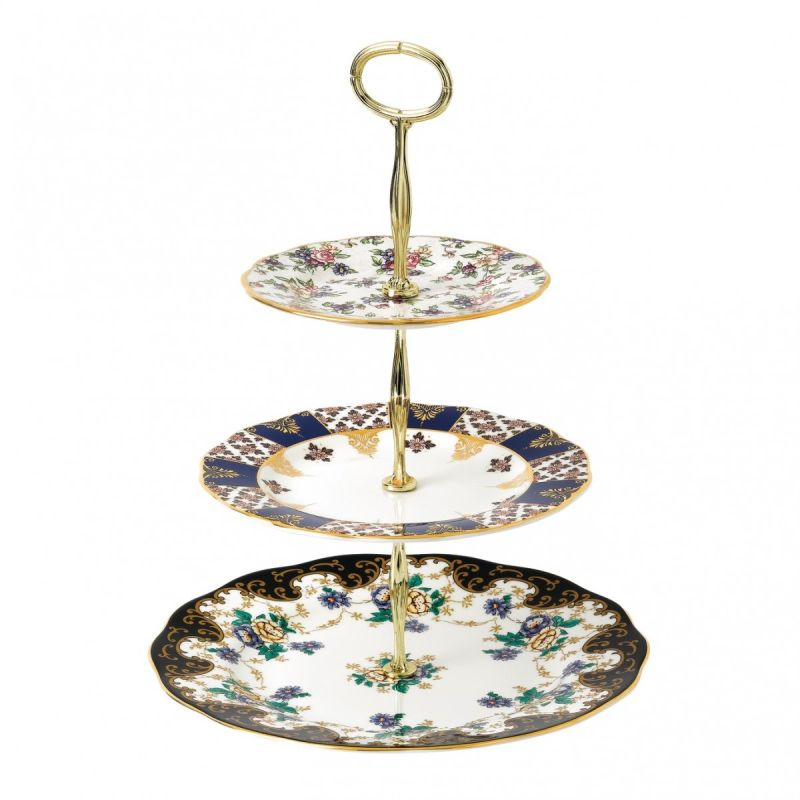

#Non-Asian countries sales change by month

In [ ]:
df_Non_Asian.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,2010-12-01,08:45:00,2010-12,Wednesday


In [ ]:
df_Non_Asian["Month"].dtypes

period[M]

In [ ]:
df_Non_Asian["Month"]=df_Non_Asian["Month"].dt.to_timestamp()

<ipython-input-171-f76bf35f3199>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Non_Asian["Month"]=df_Non_Asian["Month"].dt.to_timestamp()


In [ ]:
Non_Asian_countries_sales_change_by_month =df_Non_Asian.groupby("Month")["net sales"].sum()

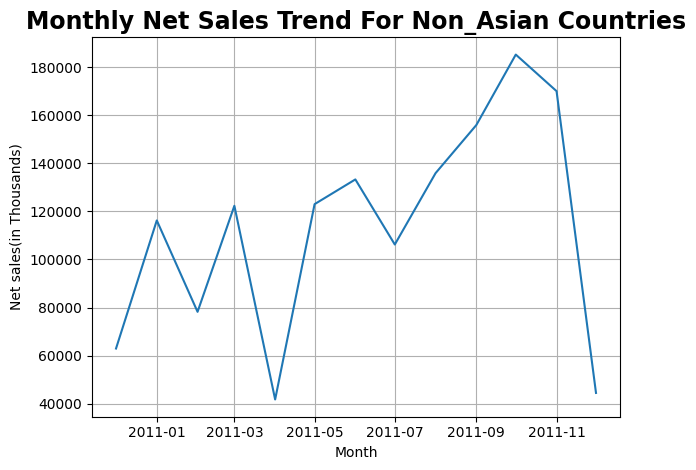

In [ ]:
sns.lineplot(Non_Asian_countries_sales_change_by_month)
plt.title("Monthly Net Sales Trend For Non_Asian Countries",fontsize=17,fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Net sales(in Thousands)")
plt.grid()
plt.tight_layout()
plt.show()

This chart shows the Monthly Net Sales trend for Non_Asian countries

The sales increase in September then decline at the end oof the year

#cancellation order

In [ ]:
df_cancellation=df[df["InvoiceNo"].astype(str).str.contains('C')]

In [ ]:
df_cancellation.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010-12-01,09:41:00,2010-12-01,Wednesday
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010-12-01,09:49:00,2010-12-01,Wednesday
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010-12-01,10:24:00,2010-12-01,Wednesday
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010-12-01,10:24:00,2010-12-01,Wednesday
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010-12-01,10:24:00,2010-12-01,Wednesday


In [ ]:
df_cancellation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9288 entries, 141 to 541717
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    9288 non-null   object        
 1   StockCode    9288 non-null   object        
 2   Description  9288 non-null   object        
 3   Quantity     9288 non-null   int64         
 4   InvoiceDate  9288 non-null   datetime64[ns]
 5   UnitPrice    9288 non-null   float64       
 6   CustomerID   9288 non-null   float64       
 7   Country      9288 non-null   object        
 8   net sales    9288 non-null   float64       
 9   Date         9288 non-null   datetime64[ns]
 10  Time         9288 non-null   object        
 11  Month        9288 non-null   datetime64[ns]
 12  Day name     9288 non-null   object        
dtypes: datetime64[ns](3), float64(3), int64(1), object(6)
memory usage: 1015.9+ KB


In [ ]:
df_cancellation.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,net sales,Date,Month
count,9288.000000,9288,9288.000000,9288.000000,9288.000000,9288,9288
mean,-29.885228,2011-06-26 03:42:05.943152640,48.393661,14373.470823,-96.556039,2011-06-25 14:02:56.744186112,2011-06-11 16:29:18.139534848
min,-80995.000000,2010-12-01 09:41:00,0.010000,0.000000,-168469.600000,2010-12-01 00:00:00,2010-12-01 00:00:00
25%,-6.000000,2011-03-21 16:15:00,1.450000,13267.000000,-17.700000,2011-03-21 00:00:00,2011-03-01 00:00:00
50%,-2.000000,2011-07-07 17:33:30,2.950000,14701.000000,-8.500000,2011-07-07 00:00:00,2011-07-01 00:00:00
75%,-1.000000,2011-10-06 20:36:00,5.950000,16283.000000,-3.700000,2011-10-06 00:00:00,2011-10-01 00:00:00
max,-1.000000,2011-12-09 11:58:00,38970.000000,18282.000000,-0.120000,2011-12-09 00:00:00,2011-12-01 00:00:00
std,1145.786965,NaN,666.600430,3417.531393,2039.905511,NaN,NaN


In [ ]:
total_cancelled_orders=df_cancellation["net sales"].sum()
print(total_cancelled_orders)

-896812.49


#Their original sales, if no orders were canceled, would be the net sales plus the canceled orders. However, the actual net sales are calculated as the sum of the net sales and the cancellations, since the cancellations are recorded as negative values in the dataset

In [ ]:
print(df["net sales"].sum())


9747747.934


In [ ]:
overall_net_sales=9747747.933999997+896812.49
print(overall_net_sales)

10644560.423999997


In [ ]:
the_most_product_cancellation=df_cancellation.groupby("StockCode")["Quantity"].sum()

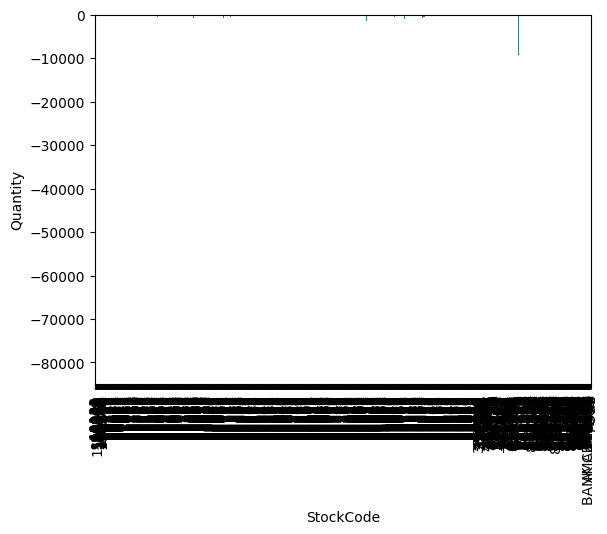

In [ ]:
sns.barplot(the_most_product_cancellation)
plt.xticks(rotation=90)
plt.show()

In [ ]:
the_most_ten_product_cancellation=df_cancellation.groupby("StockCode")["Quantity"].sum().nsmallest(15)

i used smallest becase the Quantity is negative

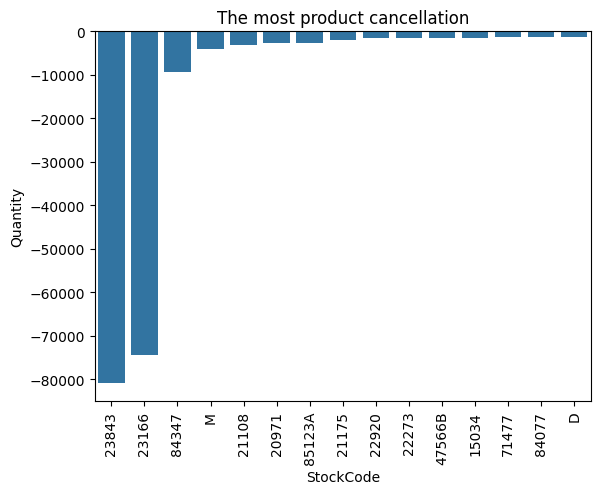

In [ ]:
sns.barplot(the_most_ten_product_cancellation)
plt.title("The most product cancellation")
plt.xticks(rotation=90)
plt.show()

This chart shows the most cancelled products based on Quantity .

The product with stockcode 23843 has the highest cancellation

i Want to see the desciption of these product

In [ ]:
df_cancellation[df_cancellation["StockCode"]=="23843"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6,2011-12-09,09:27:00,2011-12-01,Friday


#PAPER CRAFT , LITTLE BIRDIE

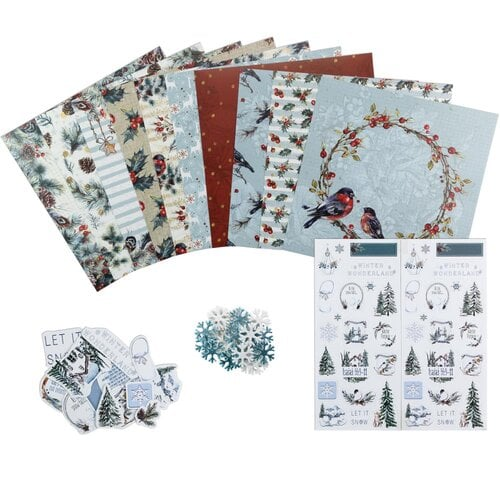

In [ ]:
df_cancellation[df_cancellation["StockCode"]=="23166"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60,2011-01-18,10:17:00,2011-01-01,Tuesday
203625,C554527,23166,MEDIUM CERAMIC TOP STORAGE JAR,-9,2011-05-24 17:25:00,1.04,15251.0,United Kingdom,-9.36,2011-05-24,17:25:00,2011-05-01,Tuesday
234364,C557508,23166,MEDIUM CERAMIC TOP STORAGE JAR,-240,2011-06-20 16:13:00,1.04,16684.0,United Kingdom,-249.60,2011-06-20,16:13:00,2011-06-01,Monday
270084,C560540,23166,MEDIUM CERAMIC TOP STORAGE JAR,-1,2011-07-19 12:26:00,1.25,12415.0,Australia,-1.25,2011-07-19,12:26:00,2011-07-01,Tuesday
290357,C562375,23166,MEDIUM CERAMIC TOP STORAGE JAR,-12,2011-08-04 14:46:00,1.25,14911.0,EIRE,-15.00,2011-08-04,14:46:00,2011-08-01,Thursday
297530,C562952,23166,MEDIUM CERAMIC TOP STORAGE JAR,-1,2011-08-11 10:10:00,1.25,12749.0,United Kingdom,-1.25,2011-08-11,10:10:00,2011-08-01,Thursday
349848,C567535,23166,MEDIUM CERAMIC TOP STORAGE JAR,-1,2011-09-21 09:50:00,1.25,15253.0,United Kingdom,-1.25,2011-09-21,09:50:00,2011-09-01,Wednesday
352712,C567677,23166,MEDIUM CERAMIC TOP STORAGE JAR,-2,2011-09-21 15:57:00,1.04,12409.0,Switzerland,-2.08,2011-09-21,15:57:00,2011-09-01,Wednesday
394002,C570867,23166,MEDIUM CERAMIC TOP STORAGE JAR,-12,2011-10-12 16:17:00,1.25,12607.0,USA,-15.00,2011-10-12,16:17:00,2011-10-01,Wednesday
421501,C572991,23166,MEDIUM CERAMIC TOP STORAGE JAR,-1,2011-10-27 10:56:00,1.25,17672.0,United Kingdom,-1.25,2011-10-27,10:56:00,2011-10-01,Thursday


MEDIUM CERAMIC TOP STORAGE JAR	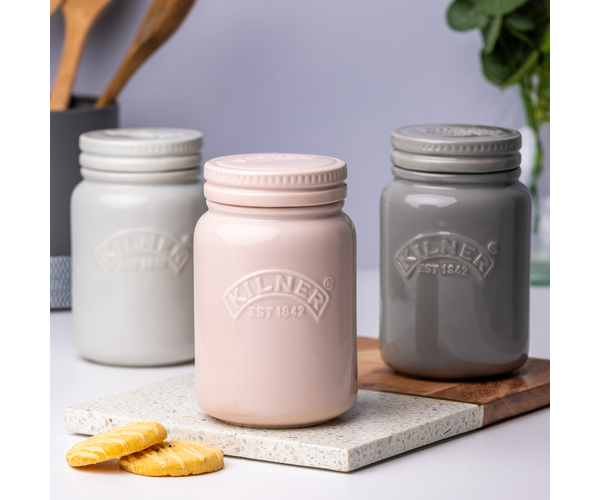

In [ ]:
in_ny_country_the_most_cancellation=df_cancellation[df_cancellation["StockCode"]=="23166"].groupby("Country")["Quantity"].sum()

<Axes: xlabel='Country', ylabel='Quantity'>

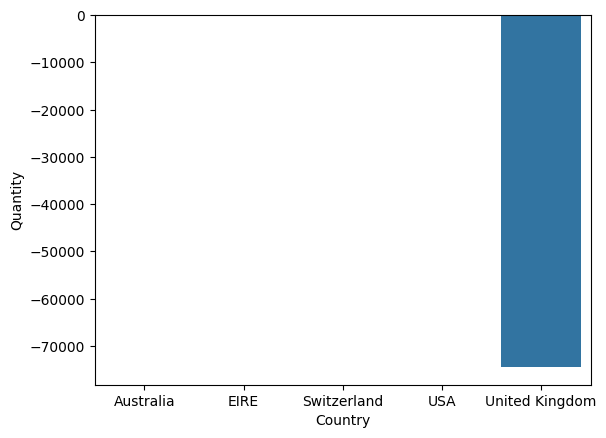

In [ ]:
sns.barplot(in_ny_country_the_most_cancellation)

#**Customer Life cycle**

In [ ]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
0,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12-01,08:26:00,2010-12-01,Wednesday


In [ ]:
df['CustomerID'].value_counts()

,count
CustomerID,
0.0,134968
17841.0,7983
14911.0,5903
14096.0,5128
12748.0,4642
...,...
13270.0,1
17763.0,1
17291.0,1


In [ ]:
customer_duration=df.groupby("CustomerID").agg(first_purchasedate=("Date","min"),last_purchasedate=("Date","max"))

In [ ]:
customer_duration["duration"]=customer_duration["last_purchasedate"]-customer_duration["first_purchasedate"]

In [ ]:
customer_duration["duration"]

,duration
CustomerID,
0.0,373 days
12346.0,0 days
12347.0,365 days
12348.0,283 days
12349.0,0 days
...,...
18280.0,0 days
18281.0,0 days
18282.0,119 days


In [ ]:
customer_duration["duration"]=customer_duration["duration"].dt.days

Text(0.5, 1.0, 'Customer life Cycle')

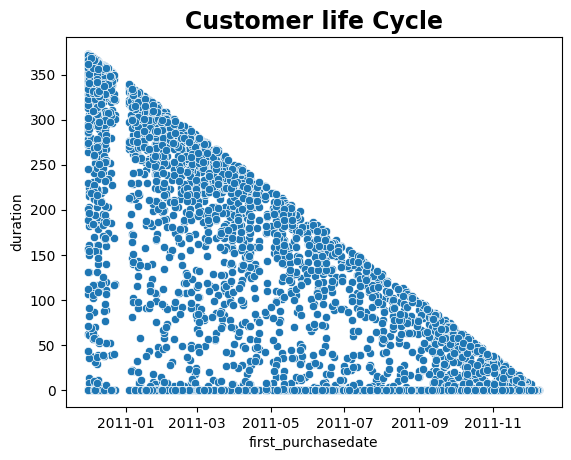

In [ ]:
sns.scatterplot(x=customer_duration["first_purchasedate"],y=customer_duration["duration"])
plt.title("Customer life Cycle",fontsize=17,fontweight="bold")


This scatter plot shows the customer lifecycle based on their firs purchase,
it makes sense for the chart to look this way because the data covers only one year. Customers who started at the end of the year naturally have shorter durations since they had less time to make purchases compared to those who started earlier in the year

#I will take a sample of Customer IDs whose first purchase occurred in December 2010 and calculate the duration for them to study the average duration for each Customer ID

In [ ]:
df_december=df[df["Month"]=='2010-12-01 00:00:00']

In [ ]:
df_december["CustomerID"]

,CustomerID
0,17850.0
1,17850.0
2,17850.0
3,17850.0
4,17850.0
...,...
42476,0.0
42477,0.0
42478,0.0
42479,0.0


In [ ]:
df_december.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,net sales,Date,Time,Month,Day name
0,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,2010-12-01,Wednesday
1,536365,71053,WHITE MOROCCAN METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,2010-12-01,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,Wednesday


In [ ]:
first= df_december.groupby('CustomerID').agg(
    first_purchase=('InvoiceDate', 'min'))
first

,first_purchase
CustomerID,
0.0,2010-12-01 11:52:00
12347.0,2010-12-07 14:57:00
12348.0,2010-12-16 19:09:00
12370.0,2010-12-14 12:58:00
12377.0,2010-12-20 09:37:00
...,...
18245.0,2010-12-19 14:58:00
18256.0,2010-12-20 08:27:00
18259.0,2010-12-08 13:38:00


In [ ]:
last= df.groupby('CustomerID').agg(
    last_purchase=('InvoiceDate', 'max'))
last

,last_purchase
CustomerID,
0.0,2011-12-09 10:26:00
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [ ]:
customer_lifecycle=first.merge(last,on="CustomerID")
customer_lifecycle

,first_purchase,last_purchase
CustomerID,,
0.0,2010-12-01 11:52:00,2011-12-09 10:26:00
12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00
12370.0,2010-12-14 12:58:00,2011-10-19 14:51:00
12377.0,2010-12-20 09:37:00,2011-01-28 15:45:00
...,...,...
18245.0,2010-12-19 14:58:00,2011-12-02 14:48:00
18256.0,2010-12-20 08:27:00,2010-12-20 08:27:00
18259.0,2010-12-08 13:38:00,2011-11-15 12:34:00


In [ ]:
customer_lifecycle['duration_days'] = (last['last_purchase'] - first['first_purchase']).dt.days
customer_lifecycle['duration_days']

,duration_days
CustomerID,
0.0,372.0
12347.0,365.0
12348.0,282.0
12370.0,309.0
12377.0,39.0
...,...
18245.0,347.0
18256.0,0.0
18259.0,341.0


In [ ]:
customer_lifecycle['duration_days'].mean()

266.2708113804004

In [ ]:
customer_lifecycle.describe()

,first_purchase,last_purchase,duration_days
count,949,949,949.000000
mean,2010-12-08 22:35:15.237091584,2011-09-01 15:37:23.329820672,266.270811
min,2010-12-01 08:26:00,2010-12-01 09:53:00,0.000000
25%,2010-12-03 13:59:00,2011-07-06 11:10:00,203.000000
50%,2010-12-08 10:53:00,2011-11-11 13:35:00,337.000000
75%,2010-12-13 13:32:00,2011-12-01 12:55:00,357.000000
max,2010-12-23 14:35:00,2011-12-09 12:49:00,373.000000
std,NaN,NaN,129.808693


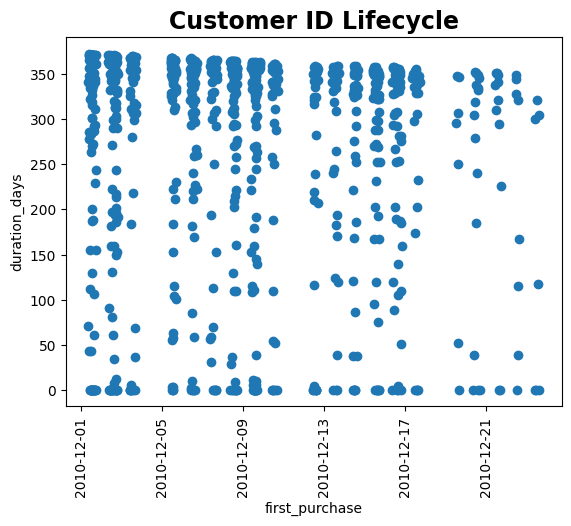

In [ ]:
plt.scatter(x=first['first_purchase'], y=customer_lifecycle['duration_days'])
plt.title("Customer ID Lifecycle",fontsize=17,fontweight="bold")
plt.xlabel("first_purchase")
plt.ylabel("duration_days")
plt.xticks(rotation=90)
plt.show()

In [ ]:
customer_lifecycle['duration_days'] = (last['last_purchase'] - first['first_purchase']).dt.days
customer_lifecycle

,first_purchase,last_purchase,duration_days
CustomerID,,,
0.0,2010-12-01 11:52:00,2011-12-09 10:26:00,372.0
12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,365.0
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282.0
12370.0,2010-12-14 12:58:00,2011-10-19 14:51:00,309.0
12377.0,2010-12-20 09:37:00,2011-01-28 15:45:00,39.0
...,...,...,...
18245.0,2010-12-19 14:58:00,2011-12-02 14:48:00,347.0
18256.0,2010-12-20 08:27:00,2010-12-20 08:27:00,0.0
18259.0,2010-12-08 13:38:00,2011-11-15 12:34:00,341.0


In [ ]:
customer_lifecycle.describe()

,first_purchase,last_purchase,duration_days
count,949,949,949.000000
mean,2010-12-08 22:35:15.237091584,2011-09-01 15:37:23.329820672,266.270811
min,2010-12-01 08:26:00,2010-12-01 09:53:00,0.000000
25%,2010-12-03 13:59:00,2011-07-06 11:10:00,203.000000
50%,2010-12-08 10:53:00,2011-11-11 13:35:00,337.000000
75%,2010-12-13 13:32:00,2011-12-01 12:55:00,357.000000
max,2010-12-23 14:35:00,2011-12-09 12:49:00,373.000000
std,NaN,NaN,129.808693


#Here i will prresent the most Loyal Customers

In [ ]:
best_customers=customer_lifecycle.groupby("CustomerID")["duration_days"].sum().nlargest(55)
best_customers

,duration_days
CustomerID,
15311.0,373.0
0.0,372.0
12433.0,372.0
12662.0,372.0
12748.0,372.0
13777.0,372.0
14606.0,372.0
14911.0,372.0
15694.0,372.0


In [ ]:
total_net_sales_for_Asian_countries=df_asian['net sales'].sum()
total_net_sales_For_non_Asian_countries=df_Non_Asian['net sales'].sum()
total_net_sales_for_UK=dfu['net sales'].sum()

In [ ]:
countries=["Asian","Non Asian","United Kingdom"]
Total_sales=[total_net_sales_for_Asian_countries,total_net_sales_For_non_Asian_countries,total_net_sales_for_UK]

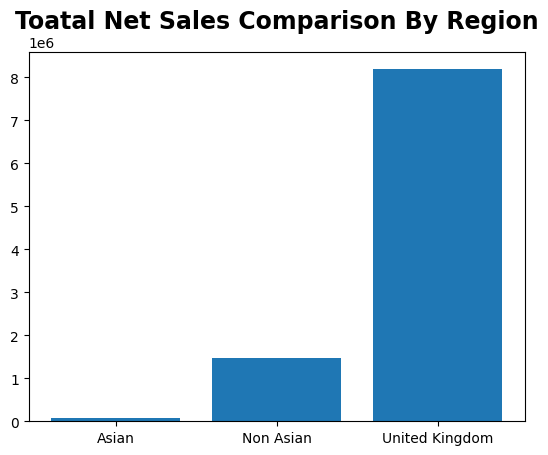

In [ ]:
plt.bar(countries,Total_sales)
plt.title("Toatal Net Sales Comparison By Region",fontsize=17,fontweight="bold")
plt.show()

In [ ]:
average_net_sales_for_Asian_countries=df_asian['net sales'].mean()
average_net_sales_For_non_Asian_countries=df_Non_Asian['net sales'].mean()
average_net_sales_for_UK=dfu['net sales'].mean()

In [ ]:
countries=["Asian","Non Asian","United Kingdom"]
average_sales=[average_net_sales_for_Asian_countries,average_net_sales_For_non_Asian_countries,average_net_sales_for_UK]

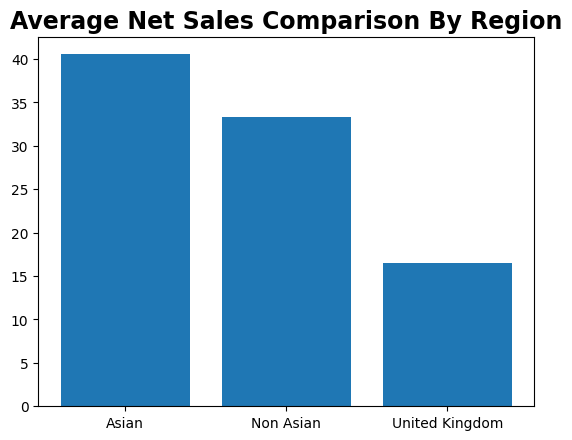

In [ ]:
plt.bar(countries,average_sales)
plt.title("Average Net Sales Comparison By Region",fontsize=17,fontweight="bold")
plt.show()

The chart shows that the Asian and Non_Asian countries have higher average sales compared UK

In [ ]:
#Total net sales for United Kingdom
dfu["net sales"].sum()

8187806.364000001

In [ ]:
##Total net sales for Asian countries
df_asian["net sales"].sum()

84418.41

In [ ]:
##Total net sales for Non Asian Countries
df_Non_Asian["net sales"].sum()

1475523.16

In [ ]:
#Total net sales For All Countries
df["net sales"].sum()

9747747.934